<a href="https://colab.research.google.com/github/MohamedAziz15/ReggressorCost-Competition/blob/main/lastVersionCost_Regressor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgb






# Data Preview

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IEEE Competition/AllBatches.csv',sep=",",encoding="UTF-8")

# df.head()

df=df_test

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19942 entries, 0 to 19941
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     19942 non-null  int64  
 1   Person Description             19942 non-null  object 
 2   Place Code                     19942 non-null  object 
 3   Customer Order                 19942 non-null  object 
 4   Additional Features in market  19942 non-null  object 
 5   Promotion Name                 19916 non-null  object 
 6   Store Kind                     19914 non-null  object 
 7   Store Sales                    19942 non-null  object 
 8   Store Cost                     19942 non-null  object 
 9   Gross Weight                   18959 non-null  float64
 10  Net Weight                     18924 non-null  float64
 11  Package Weight                 19942 non-null  float64
 12  Is Recyclable?                 19942 non-null 

In [ ]:
df.describe()

,Unnamed: 0,Gross Weight,Net Weight,Package Weight,Store Area,Grocery Area,Frozen Area,Meat Area
count,19942.00000,18959.000000,18924.000000,19942.000000,18946.000000,18900.000000,18981.000000,18967.000000
mean,9970.50000,20.081932,17.185442,2.921236,2602.295714,1780.441371,494.490102,329.654561
std,5756.90387,6.712775,6.800127,1.014127,532.042036,371.638284,147.539135,98.284822
min,0.00000,8.721600,4.433500,1.453600,1882.700000,1233.080000,227.800000,149.900000
25%,4985.25000,14.114400,11.294400,1.599000,2189.290000,1508.000000,440.920000,293.405000
50%,9970.50000,19.768900,16.861700,2.907200,2572.860000,1734.500000,470.270000,313.550000
75%,14955.75000,25.874000,23.257500,3.052500,2865.170000,2054.085000,593.930000,394.215000
max,19941.00000,31.833700,30.234700,4.506100,3692.880000,2822.670000,855.220000,570.750000


In [ ]:
df.shape

(19942, 24)

In [ ]:
df.corr()

<ipython-input-52-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,Gross Weight,Net Weight,Package Weight,Store Area,Grocery Area,Frozen Area,Meat Area
Unnamed: 0,1.000000,-0.008131,-0.009247,-0.006346,0.001338,0.001073,0.003963,0.003820
Gross Weight,-0.008131,1.000000,0.988829,-0.010479,-0.013994,-0.010836,-0.011160,-0.011254
Net Weight,-0.009247,0.988829,1.000000,-0.158591,-0.013597,-0.011243,-0.012065,-0.012137
Package Weight,-0.006346,-0.010479,-0.158591,1.000000,-0.011013,-0.005212,-0.007031,-0.007405
Store Area,0.001338,-0.013994,-0.013597,-0.011013,1.000000,0.912847,0.786094,0.785827
Grocery Area,0.001073,-0.010836,-0.011243,-0.005212,0.912847,1.000000,0.468884,0.469277
Frozen Area,0.003963,-0.011160,-0.012065,-0.007031,0.786094,0.468884,1.000000,0.999964
Meat Area,0.003820,-0.011254,-0.012137,-0.007405,0.785827,0.469277,0.999964,1.000000


#### plotting Correlation

<ipython-input-30-fa256436df5e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

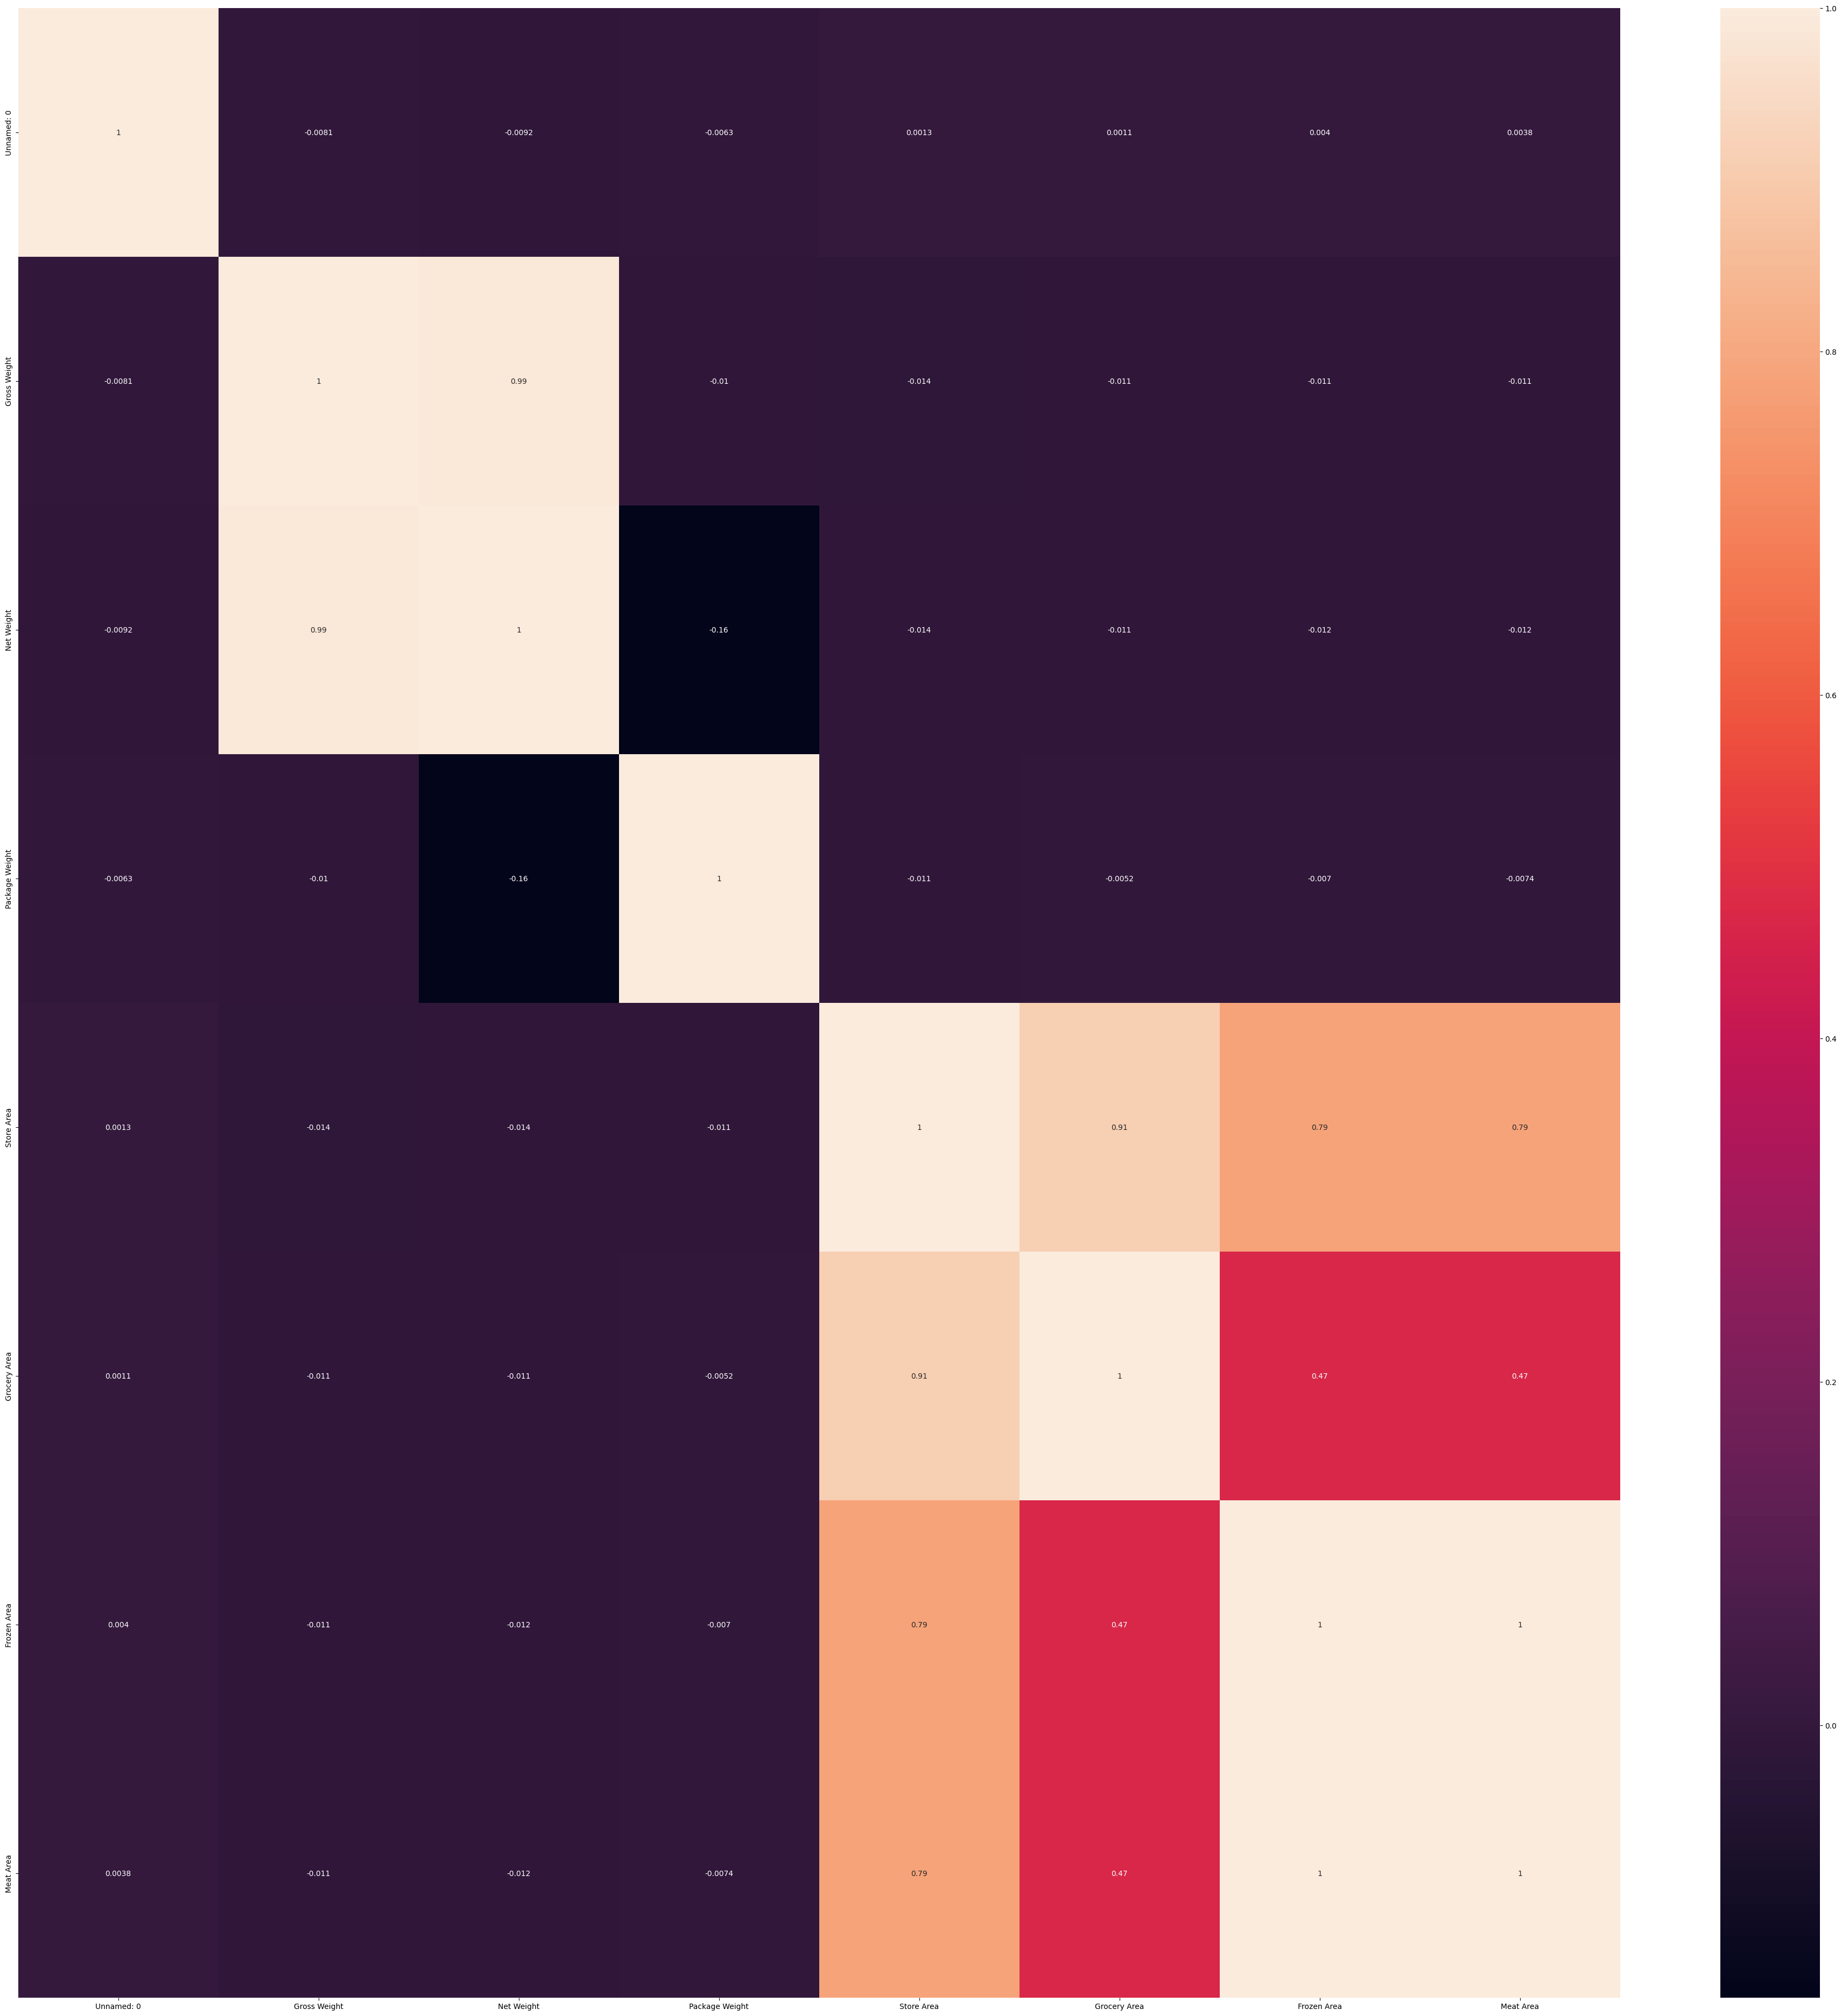

In [ ]:
plt.subplots(figsize = (48, 48))
sns.heatmap(df.corr(), annot = True)

In [ ]:
# correlationC=[]
# for column in df.columns :
#     for columnC in df.columns:
#         a = df[column].corr(df[columnC])
#         if a > 0.8 and (column != columnC) :
#             if a in correlationC:
#                 continue
#             else :
#                 correlationC.append(a)
#                 print (column +" column has high correlation with column "+ columnC)
#                 print(df[column].corr(df[columnC]))
#                 print("*******************************")

In [ ]:
df_copy = df[:]
df_copy

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area
0,0,"Single Male with four children, education: par...",B06ls_CA,"Candy from Snacks department, Ordered Brand : ...","['Florist', 'Ready Food', 'Video Store', 'Bar ...",Fantastic Discounts,Gourmet,11.76 Millions,4.704 Millions,31.8337,28.7811,3.0525,yes,50K+,2201.06,1424.85,465.54,308.73
1,1,"Married Female with three children, education:...",S01em_OR,"Vegetables from Frozen Foods department, Order...","['Florist', 'Coffee Bar', 'Ready Food', 'Bar F...",Bag Stuffer,Deluxe,2.16 Millions,0.6696 Millions,29.9440,27.0368,2.9072,no,70K+,2577.16,1735.17,505.07,336.59
2,2,"Single Female with three children, education: ...",H11go_ZA,"Dairy from Dairy department, Ordered Brand : Club","['Bar For Salad', 'Video Store', 'Ready Food',...",Pick Your Savings,Deluxe,1.83 Millions,0.8235 Millions,29.2172,26.3100,2.9072,no,130K+,2837.58,2038.11,481.98,321.26
3,3,"Single Male with three children, education: pa...",M10da_YU,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Video Store', 'Bar For Salad',...",Price Winners,Deluxe,8.82 Millions,4.41 Millions,28.0543,25.0018,3.0525,no,10K+,2859.04,1871.16,593.93,394.58
4,4,"Single Male with two children, education: high...",L05es_CA,"Hot Beverages from Beverages department, Order...",['Florist'],Dollar Days,Supermarket,4.32 Millions,1.9872 Millions,23.5482,20.6410,2.9072,no,30K+,2193.97,1320.15,523.32,348.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19937,19937,"Married Female with two children, education: p...",H11go_ZA,"Canned Clams from Canned Foods department, Ord...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Two for One,Deluxe,4.46 Millions,1.9624 Millions,11.1200,8.2128,2.9072,no,10K+,2839.33,2038.11,481.98,321.26
19938,19938,"Married Female with one child, education: part...",S03le_WA,"Bread from Baked Goods department, Ordered Bra...",['Coffee Bar'],Best Price Savers,Supermarket,3.81 Millions,1.3335 Millions,20.6410,17.5885,3.0525,no,10K+,1970.94,NaN,440.92,295.66
19939,19939,"Married Female with five children, education: ...",G16ra_JA,"Baking Goods from Baking Goods department, Ord...",['Coffee Bar'],Best Savings,Small Grocery,2.14 Millions,0.749 Millions,23.1121,20.0596,3.0525,yes,50K+,2288.65,1394.66,534.29,355.98
19940,19940,"Single Male with one child, education: graduat...",S01em_OR,"Specialty from Produce department, Ordered Bra...","['Ready Food', 'Florist', 'Video Store', 'Bar ...",Bag Stuffer,Deluxe,3.52 Millions,1.1616 Millions,16.2802,13.3585,2.9217,yes,70K+,2572.86,1734.50,503.07,335.38


# Data Preprocessing and Cleaning

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19937    False
19938    False
19939    False
19940    False
19941    False
Length: 19942, dtype: bool

In [ ]:
df.duplicated().sum()

0

In [ ]:
df= df.drop_duplicates()
df.shape

(19942, 18)

In [ ]:
df.isnull().any()

Column1                          False
marital state                    False
gender                           False
number of children               False
education                        False
working                          False
Place Code                       False
Customer Order                   False
department                       False
Ordered Brand                    False
Additional Features in market    False
Promotion Name                    True
Store Kind                        True
Store Sales                      False
Store Cost                       False
Gross Weight                      True
Net Weight                        True
Package Weight                   False
Is Recyclable?                   False
Yearly Income                    False
Store Area                        True
Grocery Area                      True
Frozen Area                       True
Meat Area                         True
dtype: bool

In [ ]:
# for i in range(df.shape[0],32):
#   # if len (df.loc[i,'Additional Features in market']) == 5 :
#     df.loc[i,'ID'] = df['ID'][32395]


In [ ]:
df = df.dropna(subset=['Customer Order','department','Ordered Brand','Cost','Min. Yearly Income'])

In [ ]:
df['ID'][32398]

'mc_ID_2'

In [ ]:
df['ID'].isnull().sum()

12947

In [ ]:
df.isnull().sum()

Column1                             0
marital state                       0
gender                              0
number of children                  0
education                           0
working                             0
Place Code                          0
Customer Order                      0
department                          0
Ordered Brand                       0
Additional Features in market       0
Promotion Name                     26
Store Kind                         28
Store Sales                         0
Store Cost                          0
Gross Weight                      983
Net Weight                       1018
Package Weight                      0
Is Recyclable?                      0
Yearly Income                       0
Store Area                        996
Grocery Area                     1042
Frozen Area                       961
Meat Area                         975
dtype: int64

In [ ]:
# Drop the existing 'ID' column
df.drop(columns=['Column1'], inplace=True)

# Generate new ordered IDs as a new column
df['ID'] = range(1, len(df) + 1)

In [ ]:
df = df.reset_index(drop=True)


In [ ]:
df.head()

,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,ID
0,"Single Male with four children, education: par...",B06ls_CA,"Candy from Snacks department, Ordered Brand : ...","['Florist', 'Ready Food', 'Video Store', 'Bar ...",Fantastic Discounts,Gourmet,11.76 Millions,4.704 Millions,31.8337,28.7811,3.0525,yes,50K+,2201.06,1424.85,465.54,308.73,1
1,"Married Female with three children, education:...",S01em_OR,"Vegetables from Frozen Foods department, Order...","['Florist', 'Coffee Bar', 'Ready Food', 'Bar F...",Bag Stuffer,Deluxe,2.16 Millions,0.6696 Millions,29.9440,27.0368,2.9072,no,70K+,2577.16,1735.17,505.07,336.59,2
2,"Single Female with three children, education: ...",H11go_ZA,"Dairy from Dairy department, Ordered Brand : Club","['Bar For Salad', 'Video Store', 'Ready Food',...",Pick Your Savings,Deluxe,1.83 Millions,0.8235 Millions,29.2172,26.3100,2.9072,no,130K+,2837.58,2038.11,481.98,321.26,3
3,"Single Male with three children, education: pa...",M10da_YU,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Video Store', 'Bar For Salad',...",Price Winners,Deluxe,8.82 Millions,4.41 Millions,28.0543,25.0018,3.0525,no,10K+,2859.04,1871.16,593.93,394.58,4
4,"Single Male with two children, education: high...",L05es_CA,"Hot Beverages from Beverages department, Order...",['Florist'],Dollar Days,Supermarket,4.32 Millions,1.9872 Millions,23.5482,20.6410,2.9072,no,30K+,2193.97,1320.15,523.32,348.85,5


In [ ]:
# df.to_csv('preprocessed_data.csv', index=False)  # Specify the file name and set index=False to exclude the index column


In [ ]:
df['Additional Features in market'].isnull().sum()

0

In [ ]:
df['Store Kind'].isnull().sum()

5807

#### Additional Feature in market VS Store Kind



In [ ]:
df['Additional Features in market'] = df['Additional Features in market'].replace('[]',np.nan)
# Calculate the percentage distribution of 'Store Kind' within each 'Additional Features in market' category
percentage_distribution_s = df.groupby('Store Kind')['Additional Features in market'].value_counts(normalize=True).unstack()
percentage_distribution_s = percentage_distribution_s.fillna(0)  # Replace NaN values with 0

# Function to fill null values based on the percentage distribution
def fill_null_values(row):
    additional_features = row['Store Kind']
    if pd.isnull(row['Additional Features in market']) and additional_features in percentage_distribution_s.index:
        percentage = percentage_distribution_s.loc[additional_features]
        return np.random.choice(percentage.index, p=percentage.values)
    else:
        return row['Additional Features in market']

# Apply the function to fill null values in 'Store Kind' column
df['Additional Features in market'] = df.apply(fill_null_values, axis=1)
# Calculate the percentage distribution of 'Store Kind' within each 'Additional Features in market' category
percentage_distribution_sss = df.groupby('Additional Features in market')['Store Kind'].value_counts(normalize=True).unstack()
percentage_distribution_sss = percentage_distribution_sss.fillna(0)  # Replace NaN values with 0

# Function to fill null values based on the percentage distribution
def fill_null_values(row):
    additional_features = row['Additional Features in market']
    if pd.isnull(row['Store Kind']) and additional_features in percentage_distribution_sss.index:
        percentage = percentage_distribution_sss.loc[additional_features]
        return np.random.choice(percentage.index, p=percentage.values)
    else:
        return row['Store Kind']

# Apply the function to fill null values in 'Store Kind' column
df['Store Kind'] = df.apply(fill_null_values, axis=1)

In [ ]:
df['Additional Features in market'].value_counts()

6.0    13169
2.0     6240
4.0     5899
5.0     4914
1.0     4051
3.0     1483
Name: Additional Features in market, dtype: int64

In [ ]:
df['Store Kind'].value_counts()

3.0    15060
5.0    14144
4.0     3939
2.0     1483
1.0     1130
Name: Store Kind, dtype: int64

In [ ]:
df = df.dropna(subset=['Additional Features in market'])
df = df.dropna(subset=['Store Kind'])


In [ ]:
df.isnull().sum()

marital state                       0
gender                              0
Number Of Childrens                 0
education                           0
working status                      0
Place Code                          0
Customer Order                      0
department                          0
Ordered Brand                       0
Additional Features in market       0
Promotion Name                      0
Store Kind                          0
Store Sales                         0
Store Cost                          0
Gross Weight                     1782
Net Weight                       1539
Package Weight                   3080
Is Recyclable?                      0
Min. Yearly Income                  0
Frozen Area                         0
Meat Area                           0
Cost                                0
Store Area                          0
Grocery Area                        0
ID                                  0
dtype: int64

In [ ]:
df = df.reset_index(drop=True)


#### Additional Features in market

In [ ]:
df['Additional Features in market'].isnull().sum()

0

In [ ]:
df['Additional Features in market'].value_counts()

[]                                                                         4397
['Coffee Bar']                                                             2287
['Florist']                                                                1272
['Bar For Salad', 'Ready Food']                                            1032
['Ready Food', 'Bar For Salad']                                            1006
                                                                           ... 
['Video Store', 'Ready Food', 'Florist', 'Bar For Salad', 'Coffee Bar']      42
['Coffee Bar', 'Florist', 'Video Store', 'Ready Food', 'Bar For Salad']      42
['Ready Food', 'Bar For Salad', 'Florist', 'Video Store', 'Coffee Bar']      41
['Coffee Bar', 'Florist', 'Bar For Salad', 'Video Store', 'Ready Food']      41
['Ready Food', 'Bar For Salad', 'Video Store', 'Florist', 'Coffee Bar']      38
Name: Additional Features in market, Length: 151, dtype: int64

In [ ]:
df = df.reset_index(drop=True)


In [ ]:
for i in range(df.shape[0]):
  # if len (df.loc[i,'Additional Features in market']) == 5 :
    item = df.loc[i,'Additional Features in market']
    if type(item) == float :
      item = 'nan'
    # print(type(item))
    # print(item)
    if len(item) == 71:
      # print(item)
      # print('----------------------------------------')
      df.loc[i,'Additional Features in market'] = "['Video Store', 'Florist', 'Ready Food', 'Coffee Bar', 'Bar For Salad']"
    elif  len(item) == 56:
      df.loc[i,'Additional Features in market'] = "['Coffee Bar', 'Ready Food', 'Florist', 'Bar For Salad']"
    elif  len(item) == 31:
      df.loc[i,'Additional Features in market'] = "['Ready Food', 'Bar For Salad']"
    elif  len(item) == 25:
      df.loc[i,'Additional Features in market'] = "['Coffee Bar', 'Florist']"
    else:
      continue


In [ ]:

df['Additional Features in market'].value_counts()


['Video Store', 'Florist', 'Ready Food', 'Coffee Bar', 'Bar For Salad']    6994
[]                                                                         4397
['Coffee Bar', 'Ready Food', 'Florist', 'Bar For Salad']                   2690
['Coffee Bar']                                                             2287
['Ready Food', 'Bar For Salad']                                            2038
['Florist']                                                                1272
['Coffee Bar', 'Florist']                                                   210
Name: Additional Features in market, dtype: int64

In [ ]:
# Decode ((Additional Features in market))
df['Additional Features in market'] = df['Additional Features in market'].replace(["['Video Store', 'Florist', 'Ready Food', 'Coffee Bar', 'Bar For Salad']","['Coffee Bar', 'Ready Food', 'Florist', 'Bar For Salad']","['Coffee Bar']","['Ready Food', 'Bar For Salad']","['Florist']","['Coffee Bar', 'Florist']"]
                                                                               , [6,5,2,4,1,3])
df['Additional Features in market'].value_counts()

6     6994
[]    4397
5     2690
2     2287
4     2038
1     1272
3      210
Name: Additional Features in market, dtype: int64

In [ ]:
df['Additional Features in market'] = df['Additional Features in market'].replace(['[]'],'nan')

In [ ]:
df['Additional Features in market'].value_counts()

6.0    6885
4.0    3514
2.0    3441
5.0    2659
1.0    2152
3.0     956
Name: Additional Features in market, dtype: int64

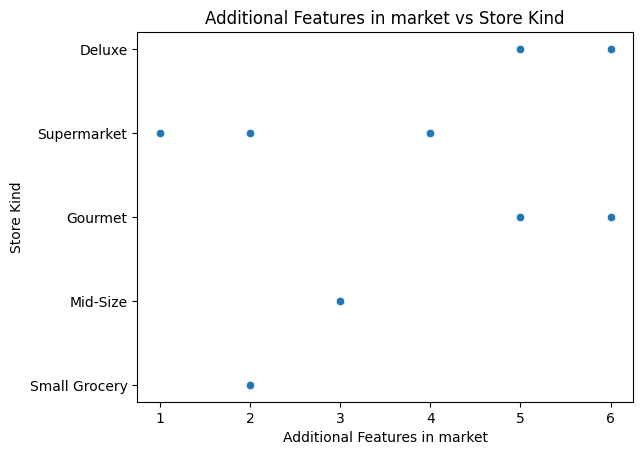

In [ ]:
# Scatter plot using Seaborn
sns.scatterplot(x='Additional Features in market', y='Store Kind', data=df)
# plt.figure(figsize=(10, 6))
plt.xlabel('Additional Features in market')
plt.ylabel('Store Kind')
plt.title('Additional Features in market vs Store Kind')
plt.show()

In [ ]:
df['Additional Features in market'].isnull().sum()

4291

In [ ]:
# correlationC=[]
# for column in df.columns :
#        print( df[column].corr(df['Additional Features in market']))
#         # if a > 0.8 and (column != 'Additional Features in market') :
#         #     if a in correlationC:
#         #         continue
#         #     else :
#        print (column +" column has high correlation with column "+ 'Additional Features in market')
#        print(df[column].corr(df['Additional Features in market']))
#        print("*******************************")

In [ ]:
# def fillNULL_AdditionalFeaturesinmarket():


In [ ]:
df['Additional Features in market'] = df['Additional Features in market'].replace('[]',np.nan)
# Calculate the percentage distribution of 'Store Kind' within each 'Additional Features in market' category
percentage_distribution_s = df.groupby('Store Kind')['Additional Features in market'].value_counts(normalize=True).unstack()
percentage_distribution_s = percentage_distribution_s.fillna(0)  # Replace NaN values with 0

# Function to fill null values based on the percentage distribution
def fill_null_values(row):
    additional_features = row['Store Kind']
    if pd.isnull(row['Additional Features in market']) and additional_features in percentage_distribution_s.index:
        percentage = percentage_distribution_s.loc[additional_features]
        return np.random.choice(percentage.index, p=percentage.values)
    else:
        return row['Additional Features in market']

# Apply the function to fill null values in 'Store Kind' column
df['Additional Features in market'] = df.apply(fill_null_values, axis=1)

In [ ]:
df['Additional Features in market'].value_count()

AttributeError: ignored

#### Store Kind

In [ ]:
df = df.dropna(subset=['Store Kind'])

<Axes: title={'center': 'Level Column Values'}, ylabel='Store Kind'>

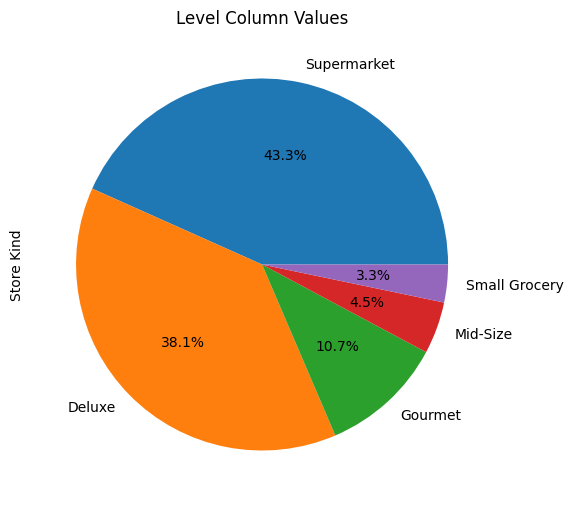

In [ ]:
plt.figure(figsize=(6,7))
plt.title("Level Column Values")
round(df["Store Kind"].value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%2.1f%%')

In [ ]:
df["Store Kind"].value_counts()

Supermarket      8500
Deluxe           7425
Gourmet          2119
Mid-Size          956
Small Grocery     607
Name: Store Kind, dtype: int64

In [ ]:
labels = {
    1: "Small Grocery",
    2: "Mid-Size",
    3: "Supermarket",
    4: "Gourmet",
    5: "Deluxe",
}

In [ ]:
# Decode ((Additional Features in market))
df["Store Kind"] = df["Store Kind"].replace([labels[3],labels[5],labels[4],labels[2],labels[1]],[3,5,4,2,1])
df["Store Kind"].value_counts()

3    7696
5    6710
4    1913
2     875
1     551
Name: Store Kind, dtype: int64

In [ ]:
df['Store Kind'].isnull().sum()

5807

In [ ]:
# Calculate the number of redundancies for each combination
redundancy_counts = df.groupby(['Store Kind', 'Additional Features in market']).size().reset_index(name='Count')

# Print the result
print(redundancy_counts)

    Store Kind Additional Features in market  Count
0          1.0                             2   1082
1          2.0                             3    291
2          2.0                           nan    591
3          3.0                             1   2204
4          3.0                             2   2753
5          3.0                             4   3253
6          3.0                           nan   3043
7          4.0                             5   1259
8          4.0                             6   2290
9          5.0                             5   3113
10         5.0                             6   9472


In [ ]:
# Calculate the number of redundancies for each combination
redundancy_counts_ = df.groupby([ 'Additional Features in market','Store Kind']).size().reset_index(name='Count')

# Print the result
print(redundancy_counts_)

   Additional Features in market  Store Kind  Count
0                              1         3.0   2204
1                              2         1.0   1082
2                              2         3.0   2753
3                              3         2.0    291
4                              4         3.0   3253
5                              5         4.0   1259
6                              5         5.0   3113
7                              6         4.0   2290
8                              6         5.0   9472
9                            nan         2.0    591
10                           nan         3.0   3043


In [ ]:
# # Create a sample DataFrame
# data = {'Store Kind': ['A', 'B', 'A', 'C', 'B', 'C'],
#         'Additional Feature in Market': ['X', 'Y', 'X', 'X', np.nan, 'Z']}
# df = pd.DataFrame(data)

# # Step 1: Calculate the percentage of each 'Store Kind' category
# percentage_per_store_kind = df['Store Kind'].value_counts(normalize=True)

# # Step 2: Fill null values based on percentage
# def fill_null(row):
#     if pd.isnull(row['Additional Feature in Market']):
#         store_kind = row['Store Kind']
#         probabilities = percentage_per_store_kind / percentage_per_store_kind[store_kind]
#         selected_category = np.random.choice(probabilities.index, p=probabilities)
#         return selected_category
#     else:
#         return row['Additional Feature in Market']

# df['Additional Feature in Market'] = df.apply(fill_null, axis=1)

# # Print the resulting DataFrame
# print(df)


In [ ]:
# Calculate the number of redundancies for each combination
redundancy_counts_s = df.groupby([ 'Additional Features in market','Store Kind']).size().reset_index(name='Count')

# Print the result
print(redundancy_counts_s)

                         Additional Features in market   Store Kind  Count
0    ['Bar For Salad', 'Coffee Bar', 'Florist', 'Re...       Deluxe     53
1    ['Bar For Salad', 'Coffee Bar', 'Florist', 'Re...      Gourmet     19
2    ['Bar For Salad', 'Coffee Bar', 'Florist', 'Re...       Deluxe     85
3    ['Bar For Salad', 'Coffee Bar', 'Florist', 'Re...      Gourmet     38
4    ['Bar For Salad', 'Coffee Bar', 'Florist', 'Vi...       Deluxe     45
..                                                 ...          ...    ...
292  ['Video Store', 'Ready Food', 'Florist', 'Bar ...      Gourmet     15
293  ['Video Store', 'Ready Food', 'Florist', 'Coff...       Deluxe     46
294  ['Video Store', 'Ready Food', 'Florist', 'Coff...      Gourmet      5
295                                                 []     Mid-Size    761
296                                                 []  Supermarket   3639

[297 rows x 3 columns]


In [ ]:
df['Additional Features in market'].value_counts()


[]                                                                         4405
['Coffee Bar']                                                             2292
['Florist']                                                                1277
['Bar For Salad', 'Ready Food']                                            1036
['Ready Food', 'Bar For Salad']                                            1012
                                                                           ... 
['Coffee Bar', 'Florist', 'Video Store', 'Ready Food', 'Bar For Salad']      42
['Ready Food', 'Bar For Salad', 'Florist', 'Video Store', 'Coffee Bar']      42
['Video Store', 'Ready Food', 'Florist', 'Bar For Salad', 'Coffee Bar']      42
['Coffee Bar', 'Florist', 'Bar For Salad', 'Video Store', 'Ready Food']      41
['Ready Food', 'Bar For Salad', 'Video Store', 'Florist', 'Coffee Bar']      38
Name: Additional Features in market, Length: 151, dtype: int64

In [ ]:
null_counts_s = df[df['Store Kind'].isnull()].groupby('Additional Features in market').size().reset_index(name='Null Count')

# Print the result
print(null_counts_s)

                        Additional Features in market  Null Count
0   ['Bar For Salad', 'Florist', 'Ready Food', 'Co...           1
1   ['Bar For Salad', 'Ready Food', 'Video Store',...           1
2                     ['Bar For Salad', 'Ready Food']           1
3   ['Coffee Bar', 'Bar For Salad', 'Florist', 'Vi...           1
4   ['Coffee Bar', 'Bar For Salad', 'Ready Food', ...           2
5   ['Coffee Bar', 'Ready Food', 'Video Store', 'B...           1
6   ['Coffee Bar', 'Video Store', 'Florist', 'Bar ...           1
7                                      ['Coffee Bar']           4
8   ['Florist', 'Coffee Bar', 'Ready Food', 'Video...           1
9                                         ['Florist']           2
10  ['Ready Food', 'Bar For Salad', 'Florist', 'Vi...           1
11                    ['Ready Food', 'Bar For Salad']           2
12  ['Ready Food', 'Coffee Bar', 'Florist', 'Bar F...           1
13  ['Ready Food', 'Florist', 'Video Store', 'Coff...           1
14  ['Read

In [ ]:
# Calculate the percentage distribution of 'Store Kind' within each 'Additional Features in market' category
percentage_distribution_s = df.groupby('Additional Features in market')['Store Kind'].value_counts(normalize=True).unstack()
percentage_distribution_s = percentage_distribution_s.fillna(0)  # Replace NaN values with 0

# Function to fill null values based on the percentage distribution
def fill_null_values(row):
    additional_features = row['Additional Features in market']
    if pd.isnull(row['Store Kind']) and additional_features in percentage_distribution_s.index:
        percentage = percentage_distribution_s.loc[additional_features]
        return np.random.choice(percentage.index, p=percentage.values)
    else:
        return row['Store Kind']

# Apply the function to fill null values in 'Store Kind' column
df['Store Kind'] = df.apply(fill_null_values, axis=1)


In [ ]:
df['Additional Features in market'].value_counts()

['Video Store', 'Florist', 'Ready Food', 'Coffee Bar', 'Bar For Salad']    13797
['Coffee Bar']                                                              6557
['Ready Food', 'Bar For Salad']                                             6254
['Coffee Bar', 'Ready Food', 'Florist', 'Bar For Salad']                    5150
['Florist']                                                                 4206
['Coffee Bar', 'Florist']                                                   1559
Name: Additional Features in market, dtype: int64

In [ ]:
# Calculate the number of redundancies for each combination
redundancy_counts_s__ = df.groupby([ 'Additional Features in market','Store Kind']).size().reset_index(name='Count')
# Print the result
print(redundancy_counts_s__)

                       Additional Features in market     Store Kind  Count
0                          ['Coffee Bar', 'Florist']       Mid-Size   1559
1  ['Coffee Bar', 'Ready Food', 'Florist', 'Bar F...         Deluxe   3681
2  ['Coffee Bar', 'Ready Food', 'Florist', 'Bar F...        Gourmet   1469
3                                     ['Coffee Bar']  Small Grocery   1224
4                                     ['Coffee Bar']    Supermarket   5333
5                                        ['Florist']    Supermarket   4206
6                    ['Ready Food', 'Bar For Salad']    Supermarket   6254
7  ['Video Store', 'Florist', 'Ready Food', 'Coff...         Deluxe  11092
8  ['Video Store', 'Florist', 'Ready Food', 'Coff...        Gourmet   2705


In [ ]:
null_count = df[['Store Kind', 'Additional Features in market']].isnull().sum()
print(null_count)

Store Kind                       1291
Additional Features in market    1291
dtype: int64


In [ ]:
#null in both at the same time
null_count_both = df[['Store Kind', 'Additional Features in market']].isnull().all(axis=1).sum()
print("Count of null values in both 'Store Kind' and 'Additional Features in market' columns:", null_count_both)


Count of null values in both 'Store Kind' and 'Additional Features in market' columns: 1291


#### Promotion Name

In [ ]:
df.head()

,marital state,gender,Number Of Childrens,education,working status,Place Code,Customer Order,department,Ordered Brand,Additional Features in market,...,Net Weight,Package Weight,Is Recyclable?,Min. Yearly Income,Frozen Area,Meat Area,Cost,Store Area,Grocery Area,ID
0,Single,F,4,bachelors degree,professional,H11go_ZA,Cleaning Supplies,Household,Red Wing,6,...,26.6008,1.5990,1,10000.0,481.98,323.00,602.7575,2842.23,2037.64,1
1,Single,F,3,bachelors degree,management,S04ne_WA,Snack Foods,Snack Foods,Nationeel,NaN,...,14.9720,1.5990,0,50000.0,457.36,NaN,708.6650,2814.95,2049.72,2
2,Married,M,2,high school degree,skilled manual,L05es_CA,Magazines,Periodicals,Excel,1,...,27.1822,1.4536,1,30000.0,523.32,348.85,564.2647,2192.32,1322.21,3
3,Single,F,3,partial college,professional,S03le_WA,Dairy,Dairy,Carlson,2,...,11.2944,2.9217,1,30000.0,440.92,293.95,724.5119,1974.73,NaN,4
4,Married,F,5,bachelors degree,professional,M10da_YU,Vegetables,Produce,Hermanos,6,...,9.7100,2.9072,0,50000.0,593.93,395.95,519.7574,2862.30,1872.19,5


In [ ]:
df["Promotion Name"].value_counts()

Two Day Sale                774
Weekend Discount            761
Save Price                  711
Super Duper Savers          685
Price Winners               665
Save It (Sale)              650
One Day Sale                614
Super Savers                605
Sale : Double Down          577
Shelf Clearing Days         568
Full Free                   548
GLD                         521
Big Time Discounts          521
Go For It                   521
Roller Savings (High)       520
Money Savers                518
Two for One                 513
Price Slashers              512
Lottery Cash Registerion    502
Price Destroyers            474
Budget Bargains             456
Saving Days                 450
Promo Big                   409
Best Price Savers           403
Dimes Off                   400
Discount Frenzy             392
Price Cutters               374
Sales Days                  372
Bag Stuffer                 361
Three for One               356
Savings Galore              353
You Save

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Promotion Name"] = le.fit_transform(df["Promotion Name"])


In [ ]:
df["Promotion Name"].value_counts().count()

49

In [ ]:
df["Promotion Name"].value_counts()

44    774
47    761
34    711
39    685
26    665
33    650
20    614
40    605
29    577
37    568
12    548
13    521
3     521
14    521
28    520
18    518
45    513
24    512
17    502
23    474
5     456
35    450
27    409
1     403
7     400
8     392
22    374
32    372
0     361
42    356
36    353
48    344
16    331
2     315
31    307
21    291
43    267
30    266
38    261
4     252
46    208
9     174
19    159
6     135
25    135
41    135
15    125
10     67
11     58
Name: Promotion Name, dtype: int64

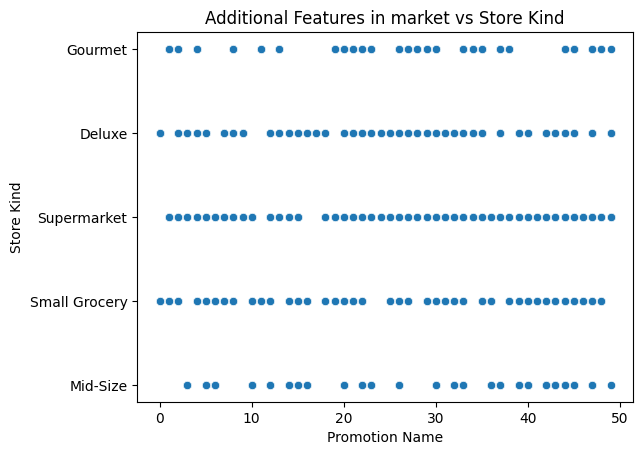

In [ ]:
# Scatter plot using Seaborn
sns.scatterplot(x='Promotion Name', y='Store Kind', data=df)
# plt.figure(figsize=(10, 6))
plt.xlabel('Promotion Name')
plt.ylabel('Store Kind')
plt.title('Additional Features in market vs Store Kind')
plt.show()

In [ ]:
df['Promotion Name'].isnull().sum()

26

In [ ]:
df = df.dropna(subset=['Promotion Name'])

In [ ]:
df['Promotion Name'].isnull().sum()

0

#### Is Recyclable?

In [ ]:
# df["Is Recyclable?"] = df["Is Recyclable?"].replace(["recyclable","non recyclable"],[1,0])
# df["Is Recyclable?"].value_counts()

1.0    10827
0.0     8579
Name: Is Recyclable?, dtype: int64

[Text(0.5, 1.0, 'Is Recyclable?')]

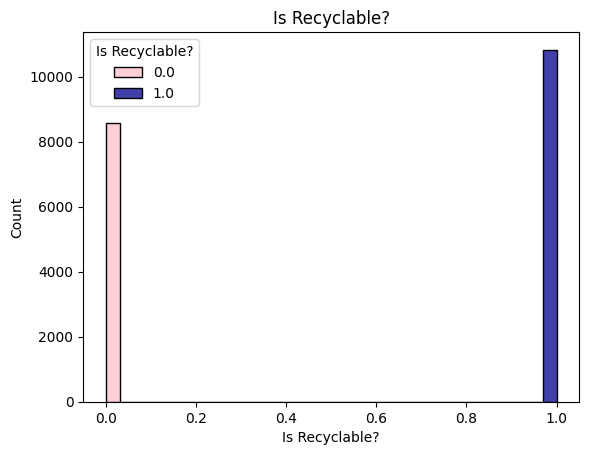

In [ ]:
# plt.subplots(figsize=(8, 4))
sns.histplot(data=df, x=df["Is Recyclable?"], hue=df["Is Recyclable?"], multiple="dodge",palette=["pink","darkblue"]).set(title='Is Recyclable?')

#### Place Code

In [ ]:
df['Place Code'].value_counts()

T02ma_WA    1897
S01em_OR    1784
P07nd_OR    1723
S03le_WA    1671
H11go_ZA    1583
M10da_YU    1459
S04ne_WA    1451
B06ls_CA    1360
L05es_CA    1272
B14on_WA    1161
V13er_BC    1095
O09ba_VE     877
C15ho_ZA     793
M12ty_DF     473
A17co_GU     463
S18co_CA     264
B08am_WA     215
V19ia_BC     210
G16ra_JA     137
Name: Place Code, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Place Code'] = le.fit_transform(df['Place Code'])

In [ ]:
df['Place Code'].value_counts()

16    1897
12    1784
11    1723
13    1671
6     1583
8     1459
14    1451
1     1360
7     1272
3     1161
17    1095
10     877
4      793
9      473
0      463
15     264
2      215
18     210
5      137
Name: Place Code, dtype: int64

#### Store Area


In [ ]:
df["Grocery Area"].isnull().sum()

1041

In [ ]:
# def fillGroceryArea():
#Grocery Area (Convert all nan to 0 )
for i in range(df.shape[0]):
    item = df.loc[i,"Grocery Area"]
    # print(type(item))
    if str(item) == 'nan' :
      df.loc[i,"Grocery Area"] = 0

      #df.loc[i,"Grocery Area"]  = float(df["Store Area"][i]) - float(df["Frozen Area"][i]) + float(df["Meat Area"][i])
      # print("Store Area ",item)

# fillGroceryArea()

In [ ]:
df["Grocery Area"].isnull().sum()

0

In [ ]:
print ("Any null values Here ? ",(df['Grocery Area']==0).sum())

Any null values Here ?  1041


In [ ]:
df["Frozen Area"][2]
df["Frozen Area"].isnull().sum()

958

In [ ]:
#Frozen Area (Convert all nan to 0 )
for i in range(df.shape[0]):
  # if len (df.loc[i,'Additional Features in market']) == 5 :
    item = df.loc[i,"Frozen Area"]
    #rename nan to 0
    # print(type(item))
    # print(item)
    if str(item) == 'nan' :
      df.loc[i,"Frozen Area"] = 0

    # print("Frozen Area",item)
    # print('----------------------------------------')
      # df.loc[i,'Additional Features in market'] = "['Video S

In [ ]:
df["Frozen Area"].isnull().sum()

0

In [ ]:
print ("Any null values Here ? ",(df['Frozen Area']==0).sum())

Any null values Here ?  958


In [ ]:
df["Meat Area"][2]
df["Meat Area"].isnull().sum()

974

In [ ]:
for i in range(df.shape[0]):
    item = df.loc[i,"Meat Area"]
    if str(item) == 'nan' :
       df.loc[i,"Meat Area"] = 0


In [ ]:
df["Meat Area"].isnull().sum()

0

In [ ]:
print ("Any null values Here ? ",(df['Meat Area']==0).sum())

Any null values Here ?  974


In [ ]:
#####################
df['Store Area'][2]

2837.58

In [ ]:
#########################
df['Store Area'].isnull().sum()

990

In [ ]:
############################
type(df['Grocery Area'][i])


numpy.float64

In [ ]:
############################
df['Grocery Area'][2]

2038.11

In [ ]:
############################
if df['Grocery Area'][2] == 1322.21:
        print(True)


In [ ]:
#convert all (nan) to  [0]
for i in range(df.shape[0]):
    item = df.loc[i,"Store Area"]
    print(type(item))
    if str(item) == 'nan' :
      df.loc[i,"Store Area"] = 0
      print(item)
      print('---------------------------------')

Streaming output truncated to the last 5000 lines.
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
nan
---------------------------------
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
nan
---------------------------------
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'n

In [ ]:
print ("Any null values Here ? ",(df['Store Area']==0).sum())

Any null values Here ?  990


In [ ]:
df['Store Area'].isnull().sum()

0

In [ ]:
# def fillStoreArea():
for i in range(df.shape[0]):
    item = df.loc[i,'Store Area']
    print(type(item))
    print(item)
    print('+++++++++++++++++++++++++++++++++++++++++++')
    # if type(item) == float :
    if item == 0:
      a = float(df['Grocery Area'][i])
      b = float(df['Frozen Area'][i])
      c = float(df['Meat Area'][i])
      # check if GroceryArea	+ FrozenArea + MeatArea Are nulls
      if df["Grocery Area"][i] != np.float64(0)  and  df["Frozen Area"][i] != np.float64(0) and  df["Meat Area"][i] != np.float64(0) :
          #Store Area = GroceryArea	+ FrozenArea + MeatArea
          df.loc[i,'Store Area']  = float(df["Grocery Area"][i]) + float(df["Frozen Area"][i]) + float(df["Meat Area"][i])
          print('Store Area'  ,df.loc[i,'Store Area'] ,' Grocery Area',df["Grocery Area"][i],' Frozen Area' ,df["Frozen Area"][i],' Meat Area'   ,df["Meat Area"][i])

      print ("Any null values Here ? ",df['Store Area'].isnull().sum())

# fillStoreArea()


Streaming output truncated to the last 5000 lines.
3147.63
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
2816.4
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
3569.79
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
2192.92
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
2807.34
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
2207.28
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
3143.74
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
3687.05
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
2093.18
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
2208.71
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
3565.8
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
1974.51
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
1883.9
++++++++++++++++++++++++++++++++

In [ ]:
#before Preprocessing
print ("Any null values Here ? ",(df['Store Area']==0).sum())

Any null values Here ?  140


In [ ]:
#After Preprocessing
print ("Any null values Here ? ",(df['Store Area']==0).sum())

Any null values Here ?  140


In [ ]:
print ("Any null values Here ? ",df['Store Area'].isnull().sum())


Any null values Here ?  0


#### Grocery Area

In [ ]:
print ("Any null values Here = ",df['Grocery Area'].isnull().sum())


Any null values Here =  0


In [ ]:
print ("Any null values Here ? ",(df['Grocery Area']==0).sum())

Any null values Here ?  1041


In [ ]:
for i in range(df.shape[0]):
    string= df['Grocery Area'].iloc[i]
    if string == 0:
      # check if StoreArea	- FrozenArea + MeatArea Are nulls
       if df["Store Area"][i] != 0  and  df["Frozen Area"][i] != 0 and  df["Meat Area"][i] != 0 :
          #GroceryArea  = store Area	+ Frozen Area + Meat Area
          df.loc[i,'Grocery Area']  = float(df["Store Area"][i]) - ( float(df["Frozen Area"][i]) + float(df["Meat Area"][i]))
          print('Grocery Area'  ,df.loc[i,'Grocery Area'] ,' Store Area',df["Store Area"][i],'- Frozen Area' ,df["Frozen Area"][i],' Meat Area'   ,df["Meat Area"][i])



Grocery Area 1870.63  Store Area 2861.13 - Frozen Area 593.93  Meat Area 396.57
Grocery Area 2822.5199999999995  Store Area 3568.72 - Frozen Area 447.7  Meat Area 298.5
Grocery Area 1734.41  Store Area 2572.86 - Frozen Area 503.07  Meat Area 335.38
Grocery Area 2053.4500000000003  Store Area 3145.51 - Frozen Area 654.13  Meat Area 437.93
Grocery Area 1520.4900000000002  Store Area 2142.38 - Frozen Area 373.1  Meat Area 248.79
Grocery Area 1399.44  Store Area 2289.92 - Frozen Area 534.29  Meat Area 356.19
Grocery Area 2055.21  Store Area 3144.54 - Frozen Area 654.13  Meat Area 435.2
Grocery Area 1322.0  Store Area 2192.32 - Frozen Area 523.32  Meat Area 347.0
Grocery Area 1508.0  Store Area 1887.7 - Frozen Area 227.8  Meat Area 151.9
Grocery Area 1323.63  Store Area 2195.8 - Frozen Area 523.32  Meat Area 348.85
Grocery Area 1237.21  Store Area 1971.64 - Frozen Area 440.92  Meat Area 293.51
Grocery Area 2447.8599999999997  Store Area 3231.68 - Frozen Area 470.27  Meat Area 313.55
Grocery

In [ ]:
print ("Any null values Here ? ",(df['Grocery Area']==0).sum())


Any null values Here ?  148


#### Frozen Area

In [ ]:
print ("Any null values Here = ",df['Frozen Area'].isnull().sum())

Any null values Here =  0


In [ ]:
print ("Any null values Here ? ",(df['Frozen Area']==0).sum())

Any null values Here ?  958


In [ ]:
for i in range(df.shape[0]):
    string= df['Frozen Area'].iloc[i]
    if string == 0:
      # check if Store Area	- [Grocery Area + Meat Area]  Are nulls
       if df["Store Area"][i] != 0  and  df["Grocery Area"][i] != 0 and  df["Meat Area"][i] != 0 :
          #Frozen Area  = store Area	- [Grocery Area + Meat Area]
          df.loc[i,'Frozen Area']  = float(df["Store Area"][i]) - (( float(df["Grocery Area"][i]) + float(df["Meat Area"][i])))
          print('Frozen Area'  ,df.loc[i,'Frozen Area'] ,'= Store Area',df["Store Area"][i],'- Grocery Area' ,df["Grocery Area"][i],'+ Meat Area'   ,df["Meat Area"][i])



Frozen Area 504.6700000000001 = Store Area 2577.59 - Grocery Area 1736.38 + Meat Area 336.54
Frozen Area 457.4300000000003 = Store Area 2812.06 - Grocery Area 2049.72 + Meat Area 304.91
Frozen Area 460.73 = Store Area 2811.99 - Grocery Area 2047.3 + Meat Area 303.96
Frozen Area 654.46 = Store Area 3145.51 - Grocery Area 2053.9 + Meat Area 437.15
Frozen Area 853.9299999999998 = Store Area 3688.58 - Grocery Area 2265.9 + Meat Area 568.75
Frozen Area 454.85000000000036 = Store Area 2810.15 - Grocery Area 2050.39 + Meat Area 304.91
Frozen Area 227.79999999999995 = Store Area 1887.7 - Grocery Area 1508.0 + Meat Area 151.9
Frozen Area 435.98 = Store Area 1967.92 - Grocery Area 1236.07 + Meat Area 295.87
Frozen Area 457.5 = Store Area 2811.99 - Grocery Area 2049.72 + Meat Area 304.77
Frozen Area 447.3499999999999 = Store Area 1975.53 - Grocery Area 1235.94 + Meat Area 292.24
Frozen Area 437.98 = Store Area 1970.94 - Grocery Area 1239.01 + Meat Area 293.95
Frozen Area 653.8500000000004 = Store

In [ ]:
print ("Any null values Here ? ",(df['Frozen Area']==0).sum())


Any null values Here ?  141


#### Meat Area

In [ ]:
print ("Any null values Here = ",df['Meat Area'].isnull().sum())

Any null values Here =  0


In [ ]:
print ("Any null values Here ? ",(df['Meat Area']==0).sum())

Any null values Here ?  974


In [ ]:
for i in range(df.shape[0]):
    string= df['Meat Area'].iloc[i]
    if string == 0:
      # check if Store Area	- [Grocery Area + Frozen Area]  Are nulls
       if df["Store Area"][i] != 0  and  df["Grocery Area"][i] != 0 and  df["Frozen Area"][i] != 0 :
          #Meat Area  = store Area	- [Grocery Area + Frozen Area]
          df.loc[i,'Meat Area']  = float(df["Store Area"][i]) - (( float(df["Grocery Area"][i]) + float(df["Frozen Area"][i])))
          print('Meat Area'  ,df.loc[i,'Meat Area'] ,'= Store Area',df["Store Area"][i],'- Grocery Area' ,df["Grocery Area"][i],'+ Frozen Area'   ,df["Frozen Area"][i])



Meat Area 310.3000000000002 = Store Area 2200.69 - Grocery Area 1424.85 + Frozen Area 465.54
Meat Area 396.03999999999996 = Store Area 2861.13 - Grocery Area 1871.16 + Frozen Area 593.93
Meat Area 393.02 = Store Area 2860.11 - Grocery Area 1871.16 + Frozen Area 595.93
Meat Area 335.28999999999996 = Store Area 2572.86 - Grocery Area 1734.5 + Frozen Area 503.07
Meat Area 227.66000000000008 = Store Area 2191.86 - Grocery Area 1623.15 + Frozen Area 341.05
Meat Area 350.3399999999997 = Store Area 2193.81 - Grocery Area 1320.15 + Frozen Area 523.32
Meat Area 396.03999999999996 = Store Area 2861.13 - Grocery Area 1871.16 + Frozen Area 593.93
Meat Area 333.6399999999999 = Store Area 2571.21 - Grocery Area 1734.5 + Frozen Area 503.07
Meat Area 151.26 = Store Area 1887.06 - Grocery Area 1508.0 + Frozen Area 227.8
Meat Area 304.90999999999985 = Store Area 2811.99 - Grocery Area 2049.72 + Frozen Area 457.36
Meat Area 308.2600000000002 = Store Area 2198.65 - Grocery Area 1424.85 + Frozen Area 465.5

In [ ]:
print ("Any null values Here ? ",(df['Meat Area']==0).sum())


Any null values Here ?  141


finally I found maxium nulls at meat area = 909

In [ ]:
df = df[df['Meat Area']!=0]
print ("Any null values Here ? ",(df['Meat Area']==0).sum())


Any null values Here ?  0


In [ ]:
df = df[df['Store Area']!=0]
print ("Any null values Here ? ",(df['Store Area']==0).sum())


Any null values Here ?  0


In [ ]:
df = df[df['Frozen Area']!=0]

In [ ]:
print ("Any null values Here ? ",(df['Frozen Area']==0).sum())


Any null values Here ?  0


In [ ]:
df = df[df['Grocery Area']!=0]
print ("Any null values Here ? ",(df['Grocery Area']==0).sum())


Any null values Here ?  0


In [ ]:
df = df.reset_index(drop=True)


#### Store Cost Vs Store Sales

In [ ]:
df['Store Cost'].value_counts()

1.5120    51
3.0240    45
2.3520    44
1.3680    40
1.5840    39
          ..
4.7744     1
1.3858     1
1.8292     1
6.1560     1
0.9417     1
Name: Store Cost, Length: 8789, dtype: int64

In [ ]:
df.isnull().sum()

marital state                      0
gender                             0
number of children                 0
education                          0
working                            0
Place Code                         0
Customer Order                     0
department                         0
Ordered Brand                      0
Additional Features in market      0
Promotion Name                     0
Store Kind                         0
Store Sales                        0
Store Cost                         0
Gross Weight                     939
Net Weight                       972
Package Weight                     0
Is Recyclable?                     0
Yearly Income                      0
Store Area                         0
Grocery Area                       0
Frozen Area                        0
Meat Area                          0
ID                                 0
dtype: int64

In [ ]:
df.shape

(36991, 25)

In [ ]:
df = df.dropna(subset=['Store Cost','Store Sales'])

In [ ]:
df = df.reset_index(drop=True)


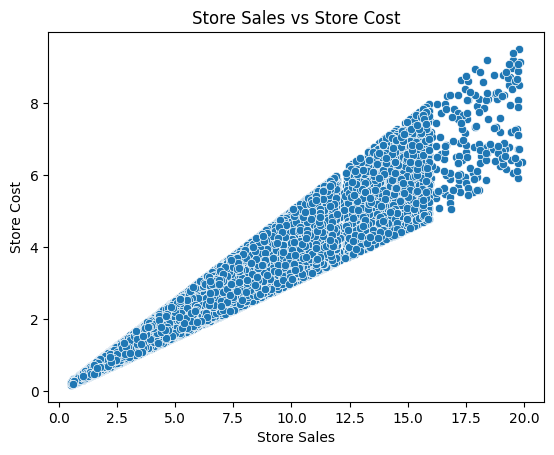

In [ ]:
# Scatter plot using Seaborn
sns.scatterplot(x='Store Sales', y='Store Cost', data=df)
# plt.figure(figsize=(10, 6))
plt.xlabel('Store Sales')
plt.ylabel('Store Cost')
plt.title('Store Sales vs Store Cost')
plt.show()

In [ ]:
df.keys()

Index(['marital state', 'gender', 'Number Of Childrens', 'education',
       'working status', 'Place Code', 'Customer Order', 'department',
       'Ordered Brand', 'Additional Features in market', 'Promotion Name',
       'Store Kind', 'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Package Weight', 'Is Recyclable?', 'Min. Yearly Income', 'Frozen Area',
       'Meat Area', 'Cost', 'Store Area', 'Grocery Area', 'ID'],
      dtype='object')

### Gross Weight

In [ ]:
df["Gross Weight"].isnull().sum()

1782

In [ ]:
import pandas as pd
import numpy as np

# Function to handle missing or zero values in weight columns
def handle_weight_columns(df):
    for i in range(df.shape[0]):
        # Replace null values with 0.0
        if pd.isnull(df["Net Weight"][i]):
            df.at[i, "Net Weight"] = 0.0

        if pd.isnull(df["Package Weight"][i]):
            df.at[i, "Package Weight"] = 0.0

        if pd.isnull(df['Gross Weight'][i]):
            df.at[i, 'Gross Weight'] = 0.0
    return df

# Function to handle 'Package Weight' column
def handle_Package_Weight(df):
    for i in range(df.shape[0]):
        # Update 'Package Weight' if it's 0.0
        if df['Package Weight'][i] == 0.0:
            #if not df["Net Weight"][i] == 0.0 and not df["Gross Weight"][i] == 0.0:
                df.at[i, 'Package Weight'] = float(df["Gross Weight"][i] - df["Net Weight"][i])
                print(df.at[i, 'Package Weight'],'Package Weight')
    return df

# Function to handle 'Gross Weight' column
def handle_Gross_Weight(df):
    for i in range(df.shape[0]):
        # Update 'Gross Weight' if it's 0.0
        if df['Gross Weight'][i] == 0.0:
            #if not df["Package Weight"][i] == 0.0 and not df["Net Weight"][i] == 0.0:
                df.at[i, 'Gross Weight'] = float(df["Package Weight"][i]) + float(df["Net Weight"][i])
                print(df.at[i, 'Gross Weight'],'Gross Weight')
    return df

# Function to handle 'Net Weight' column
def handle_Net_Weight(df):
    for i in range(df.shape[0]):
        # Update 'Net Weight' if it's 0.0
        if df['Net Weight'][i] == 0.0:
            #if not df["Gross Weight"][i] == 0.0 and not df["Gross Weight"][i] == 0.0 and not df["Package Weight"][i] == 0.0:
                df.at[i, 'Net Weight'] = float(df["Gross Weight"][i]) - float(df["Package Weight"][i])
                print(df.at[i, 'Net Weight'],'Net Weight')
    return df

# Example usage:
df = handle_weight_columns(df)
df = handle_Gross_Weight(df)
df = handle_Package_Weight(df)
df = handle_Net_Weight(df)

Streaming output truncated to the last 5000 lines.
14.6813 Gross Weight
27.1822 Gross Weight
23.5482 Gross Weight
13.8091 Gross Weight
19.1874 Gross Weight
27.1822 Gross Weight
14.5359 Gross Weight
20.641 Gross Weight
9.8554 Gross Weight
26.6008 Gross Weight
17.1524 Gross Weight
17.5885 Gross Weight
18.3153 Gross Weight
10.7421 Gross Weight
18.606 Gross Weight
25.5832 Gross Weight
21.0771 Gross Weight
0.0 Gross Weight
15.4081 Gross Weight
20.4957 Gross Weight
17.1524 Gross Weight
6.7301 Gross Weight
10.2042 Gross Weight
15.4081 Gross Weight
22.8214 Gross Weight
13.3585 Gross Weight
0.0 Gross Weight
11.338 Gross Weight
22.0946 Gross Weight
13.0823 Gross Weight
20.7864 Gross Weight
16.4256 Gross Weight
16.8617 Gross Weight
0.0 Gross Weight
16.8617 Gross Weight
27.1822 Gross Weight
14.6813 Gross Weight
13.3585 Gross Weight
6.7011 Gross Weight
19.7689 Gross Weight
12.4428 Gross Weight
0.0 Gross Weight
12.1956 Gross Weight
14.972 Gross Weight
25.874 Gross Weight
19.9142 Gross Weight
25.7286

In [ ]:
df['Gross Weight'].isnull().sum()

0

In [ ]:
print ("Any null values Here ? ",(df['Gross Weight']==0).sum())

Any null values Here ?  241


In [ ]:
df = df.dropna(subset=['Gross Weight'])
df['Gross Weight'].isnull().sum()

0

In [ ]:
df = df.reset_index(drop=True)


In [ ]:
df.isnull().sum()

marital state                    0
gender                           0
Number Of Childrens              0
education                        0
working status                   0
Place Code                       0
Customer Order                   0
department                       0
Ordered Brand                    0
Additional Features in market    0
Promotion Name                   0
Store Kind                       0
Store Sales                      0
Store Cost                       0
Gross Weight                     0
Net Weight                       0
Package Weight                   0
Is Recyclable?                   0
Min. Yearly Income               0
Frozen Area                      0
Meat Area                        0
Cost                             0
Store Area                       0
Grocery Area                     0
ID                               0
dtype: int64

In [ ]:
#Frozen Area (Convert all nan to 0 )
for i in range(df.shape[0]):
  # if len (df.loc[i,'Additional Features in market']) == 5 :
    item = df.loc[i,"Gross Weight"]
    #rename nan to 0
    print(type(item))
    print(item)

Streaming output truncated to the last 5000 lines.
<class 'numpy.float64'>
14.972
<class 'numpy.float64'>
9.4629
<class 'numpy.float64'>
20.0596
<class 'numpy.float64'>
10.2624
<class 'numpy.float64'>
11.12
<class 'numpy.float64'>
13.9254
<class 'numpy.float64'>
14.5359
<class 'numpy.float64'>
11.1054
<class 'numpy.float64'>
10.5822
<class 'numpy.float64'>
27.7636
<class 'numpy.float64'>
20.3503
<class 'numpy.float64'>
23.1121
<class 'numpy.float64'>
11.8468
<class 'numpy.float64'>
26.6008
<class 'numpy.float64'>
23.2575
<class 'numpy.float64'>
10.5531
<class 'numpy.float64'>
16.4256
<class 'numpy.float64'>
17.4431
<class 'numpy.float64'>
20.641
<class 'numpy.float64'>
8.9832
<class 'numpy.float64'>
28.3451
<class 'numpy.float64'>
18.3153
<class 'numpy.float64'>
15.5534
<class 'numpy.float64'>
19.7689
<class 'numpy.float64'>
23.1121
<class 'numpy.float64'>
12.6753
<class 'numpy.float64'>
16.8617
<class 'numpy.float64'>
8.9977
<class 'numpy.float64'>
21.0771
<class 'numpy.float64'>
28.4

In [ ]:
df['Gross Weight'].isnull().sum()

1942

In [ ]:
print ("Any null values Here ? ",(df['Gross Weight']==0).sum())

Any null values Here ?  0


In [ ]:
df['Package Weight'].isnull().sum()

3575

In [ ]:
print ("Any null values Here ? ",(df['Package Weight']==0).sum())

Any null values Here ?  0


In [ ]:
#Frozen Area (Convert all nan to 0 )
for i in range(df.shape[0]):
  # if len (df.loc[i,'Additional Features in market']) == 5 :
    item = df.loc[i,"Package Weight"]
    #rename nan to 0
    # print(type(item))
    # print(item)
    # print('-------------------------------------')
    if str(item) == 'nan' :
      df.loc[i,"Package Weight"] = 0

In [ ]:
df['Package Weight'].isnull().sum()

0

In [ ]:
print ("Any null values Here ? ",(df['Package Weight']==0).sum())

Any null values Here ?  3575


In [ ]:
df['Net Weight'].isnull().sum()

1935

In [ ]:
print ("Any null values Here ? ",(df['Net Weight']==0).sum())

Any null values Here ?  0


In [ ]:
#Frozen Area (Convert all nan to 0 )
for i in range(df.shape[0]):
  # if len (df.loc[i,'Additional Features in market']) == 5 :
    item = df.loc[i,"Net Weight"]
    #rename nan to 0
    print(type(item))
    print(item)
    print('------------------------------')
    if str(item) == 'nan' :
      df.loc[i,"Net Weight"] = 0

Streaming output truncated to the last 5000 lines.
27.1822
------------------------------
<class 'numpy.float64'>
24.4204
------------------------------
<class 'numpy.float64'>
23.6936
------------------------------
<class 'numpy.float64'>
24.1296
------------------------------
<class 'numpy.float64'>
15.2627
------------------------------
<class 'numpy.float64'>
21.2225
------------------------------
<class 'numpy.float64'>
9.0413
------------------------------
<class 'numpy.float64'>
20.4957
------------------------------
<class 'numpy.float64'>
8.7216
------------------------------
<class 'numpy.float64'>
9.7536
------------------------------
<class 'numpy.float64'>
13.3585
------------------------------
<class 'numpy.float64'>
7.6023
------------------------------
<class 'numpy.float64'>
25.7286
------------------------------
<class 'numpy.float64'>
13.8091
------------------------------
<class 'numpy.float64'>
16.8617
------------------------------
<class 'numpy.float64'>
7.4279
-

In [ ]:
df['Net Weight'].isnull().sum()

0

In [ ]:
print ("Any null values Here ? ",(df['Net Weight']==0).sum())

Any null values Here ?  1935


In [ ]:
print ("Any null values Here ? ",(df['Gross Weight']==0.0).sum())

Any null values Here ?  0


In [ ]:
# def fill Gross_Wieght():
for i in range(df.shape[0]):
    item = df.loc[i,'Gross Weight']
    print(type(item))
    print(item)
    print('+++++++++++++++++++++++++++++++++++++++++++')
    # if type(item) == float :
    if item == 0.0:
      # check if Package Weight	+ Net Weight Are nulls
      if df["Package Weight"][i] != 0.0  and  df["Net Weight"][i] != 0.0 :
          #Gross Weight = Package Weight	+ Net Weight
          df.loc[i,'Gross Weight']  = float(df["Package Weight"][i]) + float(df["Net Weight"][i])
          print('Gross Weight'  ,df.loc[i,'Gross Weight'] ,' Package Weight',df["Package Weight"][i],' Net Weight' ,df["Net Weight"][i])

      print ("Any null values Here ? ",df['Gross Weight'].isnull().sum())

# fillStoreArea()


Streaming output truncated to the last 5000 lines.
30.0894
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
26.0193
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
26.7461
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
25.5832
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
18.1699
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
22.676
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
13.4021
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
23.4028
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
13.0823
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
11.2072
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
14.8266
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
10.524
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
28.6358
+++++++++++++++++++++++++++++++

### Package Weight

In [ ]:
df["Package Weight"].isnull().sum()

0

In [ ]:
df.shape[0]

38814

In [ ]:
#Package Weight (Convert all nan to 0 )
for i in range(38821):
    item = df.loc[i,'Package Weight']
    print(type(item))
    print(item)

    if str(item) == 'nan' :
      df.loc[i,"Package Weight"] = 0



Streaming output truncated to the last 5000 lines.
<class 'numpy.float64'>
2.9072
<class 'numpy.float64'>
2.9072
<class 'numpy.float64'>
2.9072
<class 'numpy.float64'>
2.9217
<class 'numpy.float64'>
2.9072
<class 'numpy.float64'>
2.9217
<class 'numpy.float64'>
1.4536
<class 'numpy.float64'>
2.9217
<class 'numpy.float64'>
2.9072
<class 'numpy.float64'>
1.4536
<class 'numpy.float64'>
2.9072
<class 'numpy.float64'>
3.0525
<class 'numpy.float64'>
2.9217
<class 'numpy.float64'>
3.0525
<class 'numpy.float64'>
1.4536
<class 'numpy.float64'>
2.9072
<class 'numpy.float64'>
2.9072
<class 'numpy.float64'>
2.9072
<class 'numpy.float64'>
1.599
<class 'numpy.float64'>
2.9217
<class 'numpy.float64'>
2.9072
<class 'numpy.float64'>
2.9072
<class 'numpy.float64'>
2.9217
<class 'numpy.float64'>
2.9072
<class 'numpy.float64'>
3.0525
<class 'numpy.float64'>
2.9072
<class 'numpy.float64'>
4.3608
<class 'numpy.float64'>
2.9072
<class 'numpy.float64'>
1.4536
<class 'numpy.float64'>
1.4536
<class 'numpy.float6

KeyError: ignored

In [ ]:
df["Grocery Area"].isnull().sum()

In [ ]:
print ("Any null values Here ? ",(df['Grocery Area']==0).sum())

In [ ]:
# def fillStoreArea():
for i in range(df.shape[0]):
    item = df.loc[i,'Store Area']
    print(type(item))
    print(item)
    print('+++++++++++++++++++++++++++++++++++++++++++')
    # if type(item) == float :
    if item == 0:
      a = float(df['Grocery Area'][i])
      b = float(df['Frozen Area'][i])
      c = float(df['Meat Area'][i])
      # check if GroceryArea	+ FrozenArea + MeatArea Are nulls
      if df["Grocery Area"][i] != np.float64(0)  and  df["Frozen Area"][i] != np.float64(0) and  df["Meat Area"][i] != np.float64(0) :
          #Store Area = GroceryArea	+ FrozenArea + MeatArea
          df.loc[i,'Store Area']  = float(df["Grocery Area"][i]) + float(df["Frozen Area"][i]) + float(df["Meat Area"][i])
          print('Store Area'  ,df.loc[i,'Store Area'] ,' Grocery Area',df["Grocery Area"][i],' Frozen Area' ,df["Frozen Area"][i],' Meat Area'   ,df["Meat Area"][i])

      print ("Any null values Here ? ",df['Store Area'].isnull().sum())

# fillStoreArea()


In [ ]:
row_index = 101

if row_index in df.index:
    print(df.loc[row_index])
else:
    print(f"Row with index {row_index} does not exist.")


In [ ]:
df['Frozen Area'][101]

### Net Weight

### marital state

In [ ]:
df['marital state'].value_counts()

Single     18707
Married    18284
Name: marital state, dtype: int64

In [ ]:
df["marital state"] = df["marital state"].replace(["Single","Married"],[1,0])
df["marital state"].value_counts()

1    18707
0    18284
Name: marital state, dtype: int64

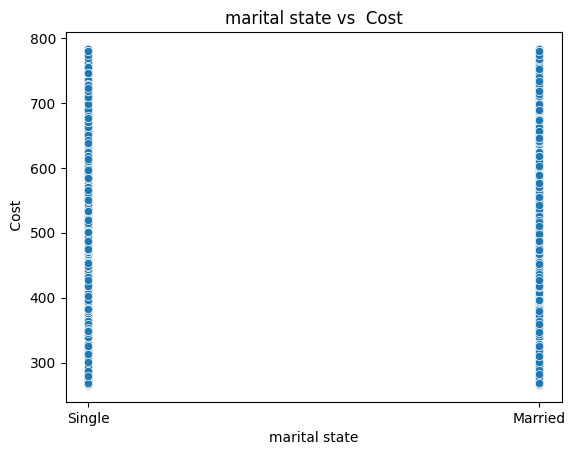

In [ ]:
# Scatter plot using Seaborn
sns.scatterplot(x="marital state", y='Cost', data=df)
# plt.figure(figsize=(10, 6))
plt.xlabel("marital state")
plt.ylabel(' Cost')
plt.title("marital state vs  Cost")
plt.show()

### gender




In [ ]:
df['gender'].value_counts()

F    9064
M    8681
Name: gender, dtype: int64

In [ ]:
df["gender"] = df["gender"].replace(["F","M"],[0,1])
df["gender"].value_counts()

0    9064
1    8681
Name: gender, dtype: int64

### Education

In [ ]:
df['education'].value_counts()


partial high school    5909
high school degree     5846
bachelors degree       5158
partial college        1687
graduate degree        1007
Name: education, dtype: int64

In [ ]:
df["education"] = df["education"].replace(["partial high school","high school degree","partial college","graduate degree","bachelors degree"],[1,2,3,5,4])
df["education"].value_counts()

1    5909
2    5846
4    5158
3    1687
5    1007
Name: education, dtype: int64

### working status

In [ ]:
df.keys()

Index(['marital state', 'gender', 'number of children', 'education', 'working',
       'Place Code', 'Customer Order', 'department', 'Ordered Brand',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Package Weight', 'Is Recyclable?', 'Yearly Income', 'Store Area',
       'Grocery Area', 'Frozen Area', 'Meat Area', 'ID'],
      dtype='object')

In [ ]:
df['working'].value_counts()


professional      6400
skilled manual    5273
manual            4698
management        2892
clerical           344
Name: working, dtype: int64

In [ ]:
df["working"] = df["working"].replace(["manual","skilled manual","clerical","professional","management"],[1,2,3,4,5])
df["working"].value_counts()

4    6400
2    5273
1    4698
5    2892
3     344
Name: working, dtype: int64

### Customer Order

In [ ]:
df['Customer Order'].value_counts()


Vegetables               2292
Snack Foods              2235
Dairy                    1269
Meat                     1022
Fruit                     976
Jams and Jellies          831
Breakfast Foods           664
Baking Goods              658
Bread                     595
Canned Soup               545
Beer and Wine             517
Bathroom Products         514
Paper Products            509
Candy                     478
Electrical                474
Frozen Desserts           474
Specialty                 394
Starchy Foods             381
Magazines                 332
Kitchen Products          317
Hot Beverages             307
Eggs                      301
Pizza                     292
Pain Relievers            275
Hygiene                   275
Pure Juice Beverages      255
Cleaning Supplies         240
Carbonated Beverages      234
Drinks                    190
Side Dishes               188
Hardware                  186
Plastic Products          181
Frozen Entrees            180
Canned Tun

In [ ]:
df['Customer Order'].value_counts().count()

45

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Customer Order'] = le.fit_transform(df['Customer Order'])


In [ ]:
df['Customer Order'].value_counts()

44    2292
41    2235
17    1269
31    1022
24     976
28     831
4      664
0      658
3      595
12     545
2      517
1      514
35     509
6      478
21     474
22     474
42     394
43     381
30     332
29     317
26     307
20     301
36     292
34     275
27     275
38     255
15     240
14     234
19     190
40     188
25     186
37     181
23     180
13     141
18     137
16     131
39     124
7       76
32      69
33      69
9       62
10      60
8       56
11      53
5       48
Name: Customer Order, dtype: int64

### Department

In [ ]:
df['department'].value_counts()

 Produce                2672
 Snack Foods            2235
 Frozen Foods           2001
 Household              1961
 Baking Goods           1489
 Canned Foods           1376
 Health and Hygiene     1272
 Dairy                  1269
 Beverages               986
 Deli                    901
 Baked Goods             595
 Alcoholic Beverages     517
 Snacks                  478
 Starchy Foods           381
 Periodicals             332
 Eggs                    301
 Breakfast Foods         254
 Meat                    137
 Canned Products         128
 Seafood                 124
 Checkout                123
 Carousel                 75
Name: department, dtype: int64

In [ ]:
df['department'].value_counts().count()

22

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["department"] = le.fit_transform(df["department"])


In [ ]:
df['department'].value_counts()


17    2672
19    2235
12    2001
14    1961
2     1489
5     1376
13    1272
9     1269
3      986
10     901
1      595
0      517
20     478
21     381
16     332
11     301
4      254
15     137
6      128
18     124
8      123
7       75
Name: department, dtype: int64

### Ordered Brand

In [ ]:
df['Ordered Brand'].value_counts().count()

111

In [ ]:
df['Ordered Brand'].value_counts()


Hermanos     564
Tell Tale    559
Tri-State    537
Ebony        507
High Top     505
            ... 
Big City      20
Symphony      17
King          13
Toretti       11
Prelude       11
Name: Ordered Brand, Length: 111, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Ordered Brand'] = le.fit_transform(df['Ordered Brand'])


In [ ]:
df['Ordered Brand'].value_counts()


54     564
100    559
107    537
33     507
56     505
      ... 
10      20
99      17
66      13
105     11
83      11
Name: Ordered Brand, Length: 111, dtype: int64

<ipython-input-162-4343b902b3ed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


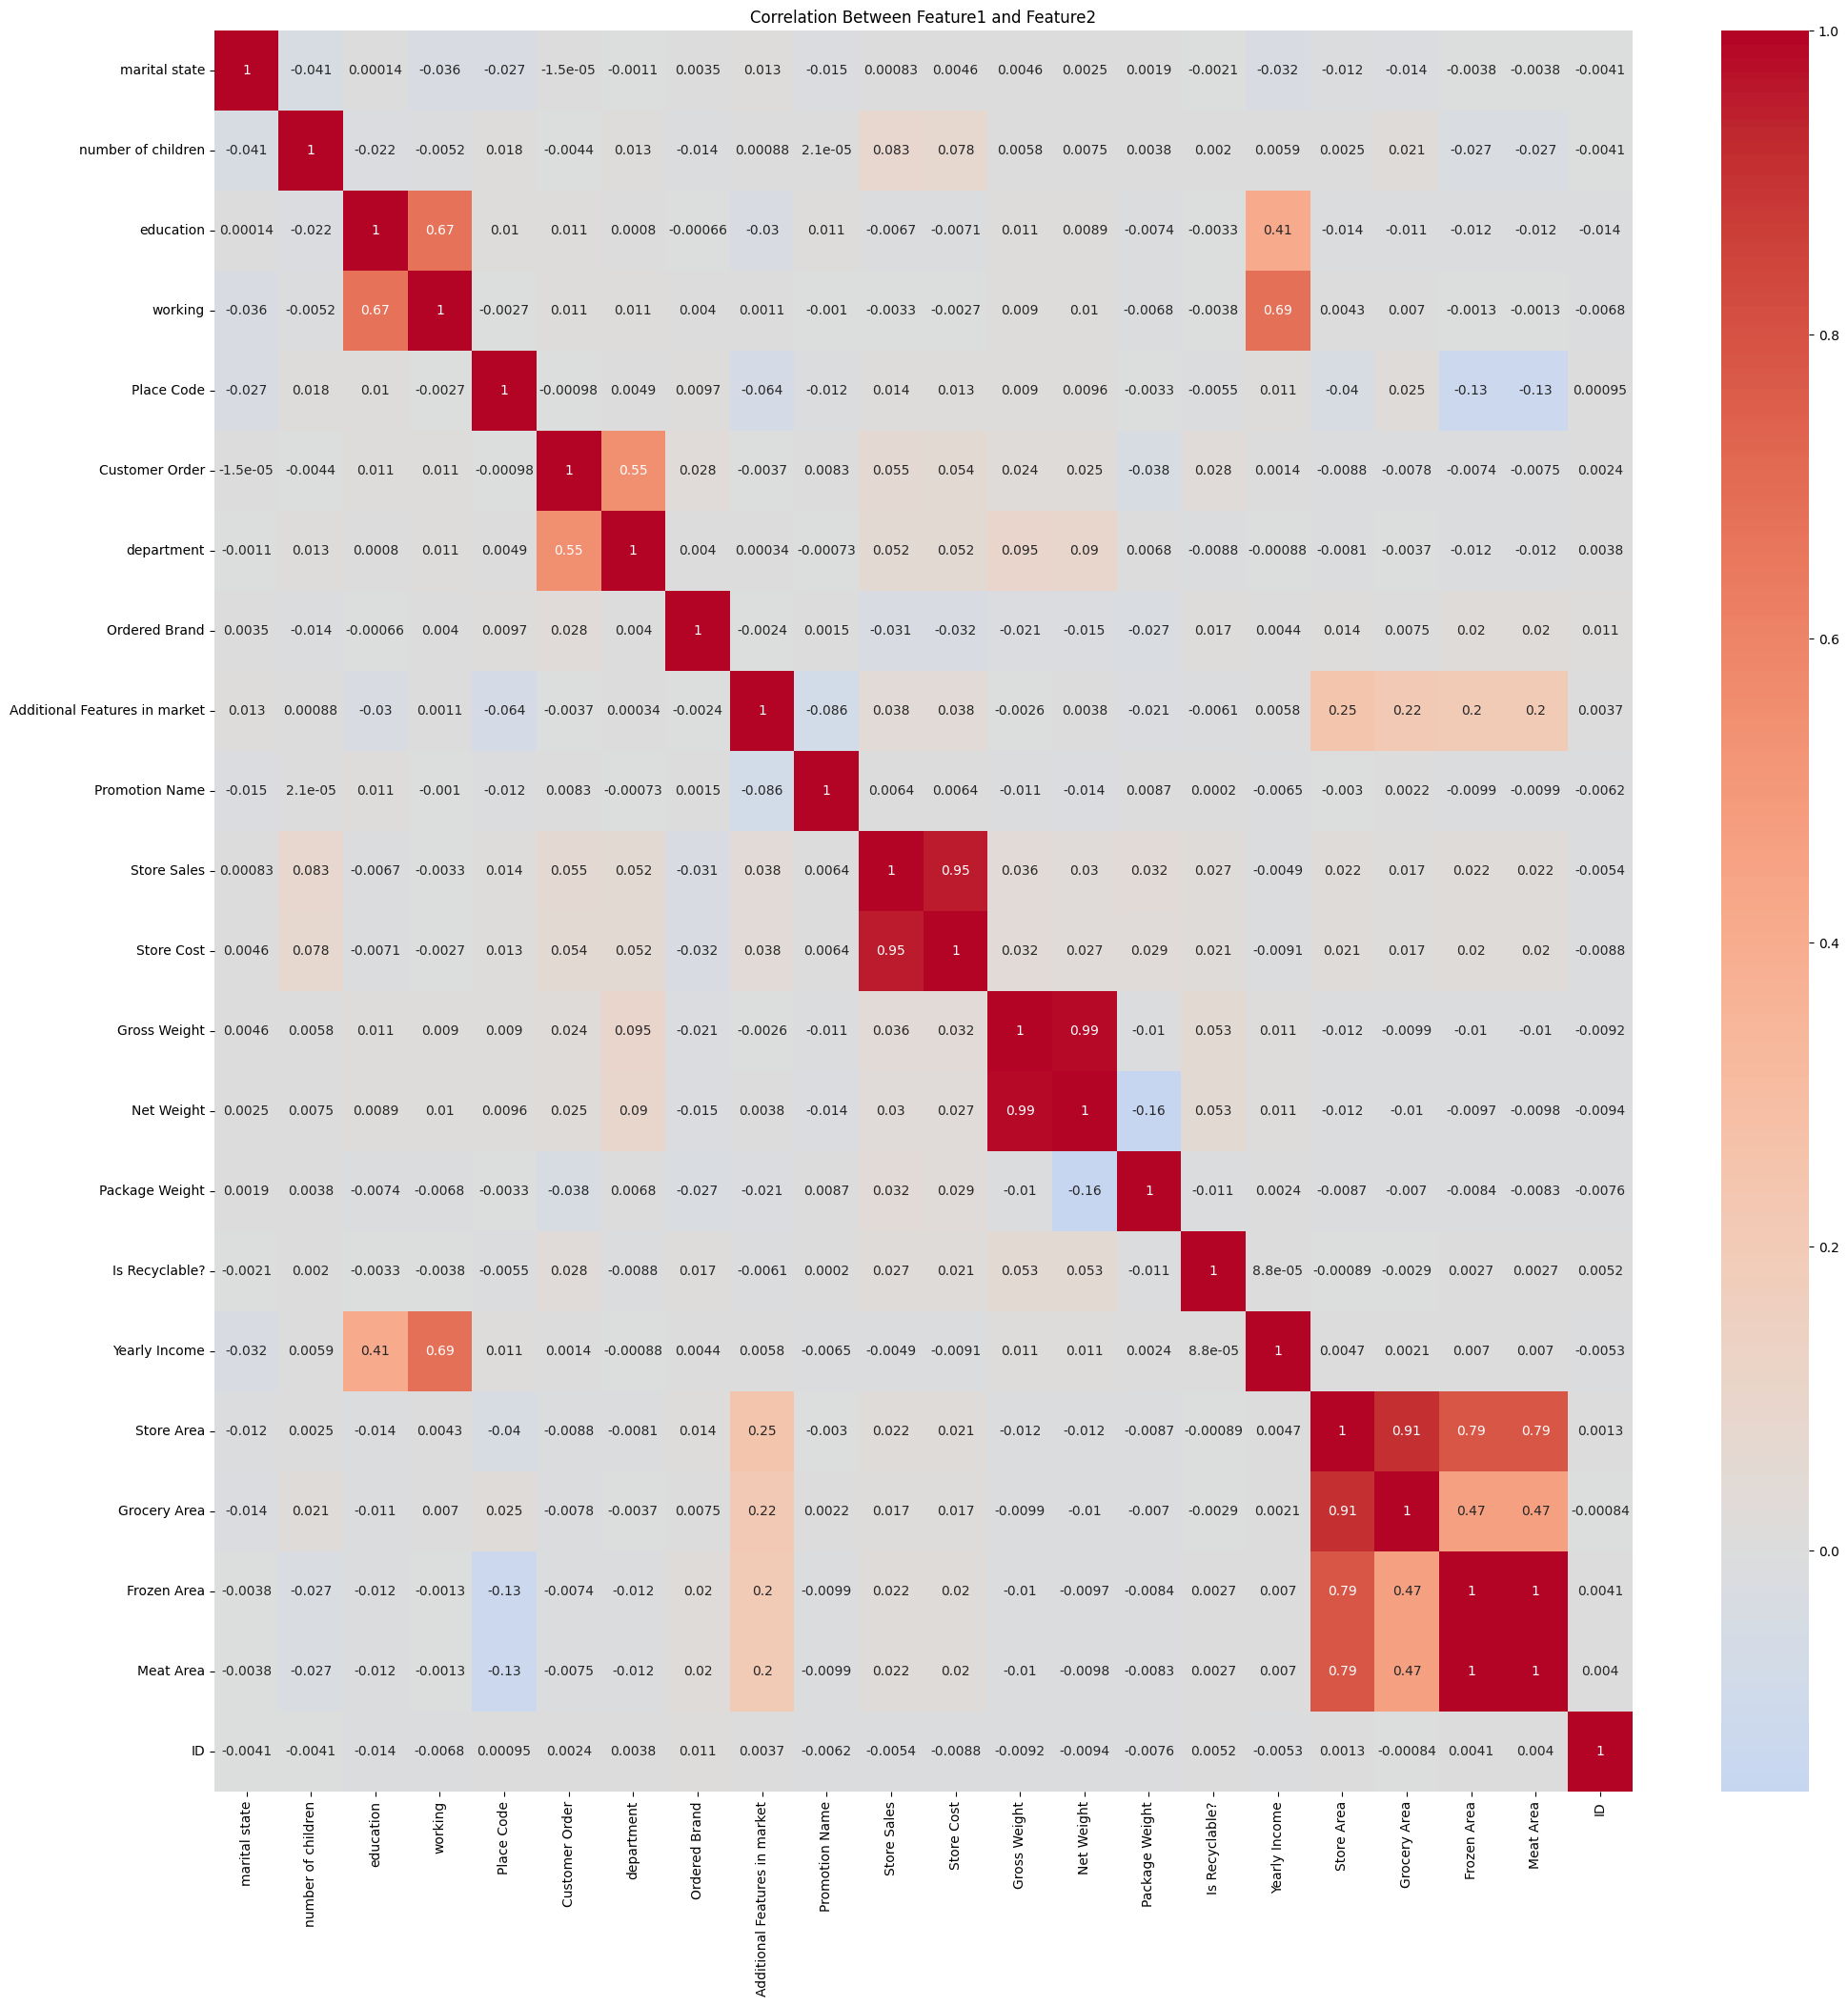

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap to visualize the correlation
plt.figure(figsize=(24, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Feature1 and Feature2')
plt.show()


In [ ]:
df.to_csv('test_BeforeOutliers_preprocessed_data.csv', index=False)  # Specify the file name and set index=False to exclude the index column


### Outliers

In [ ]:
df.isnull().sum()

marital state                      0
gender                             0
number of children                 0
education                          0
working                            0
Place Code                         0
Customer Order                     0
department                         0
Ordered Brand                      0
Additional Features in market      0
Promotion Name                     0
Store Kind                         0
Store Sales                        0
Store Cost                         0
Gross Weight                     939
Net Weight                       972
Package Weight                     0
Is Recyclable?                     0
Yearly Income                      0
Store Area                         0
Grocery Area                       0
Frozen Area                        0
Meat Area                          0
ID                                 0
dtype: int64

In [ ]:
df = df.dropna(subset=['Net Weight'])

In [ ]:
df['Net Weight'].isnull().sum()

0

In [ ]:
df.shape

(36991, 25)

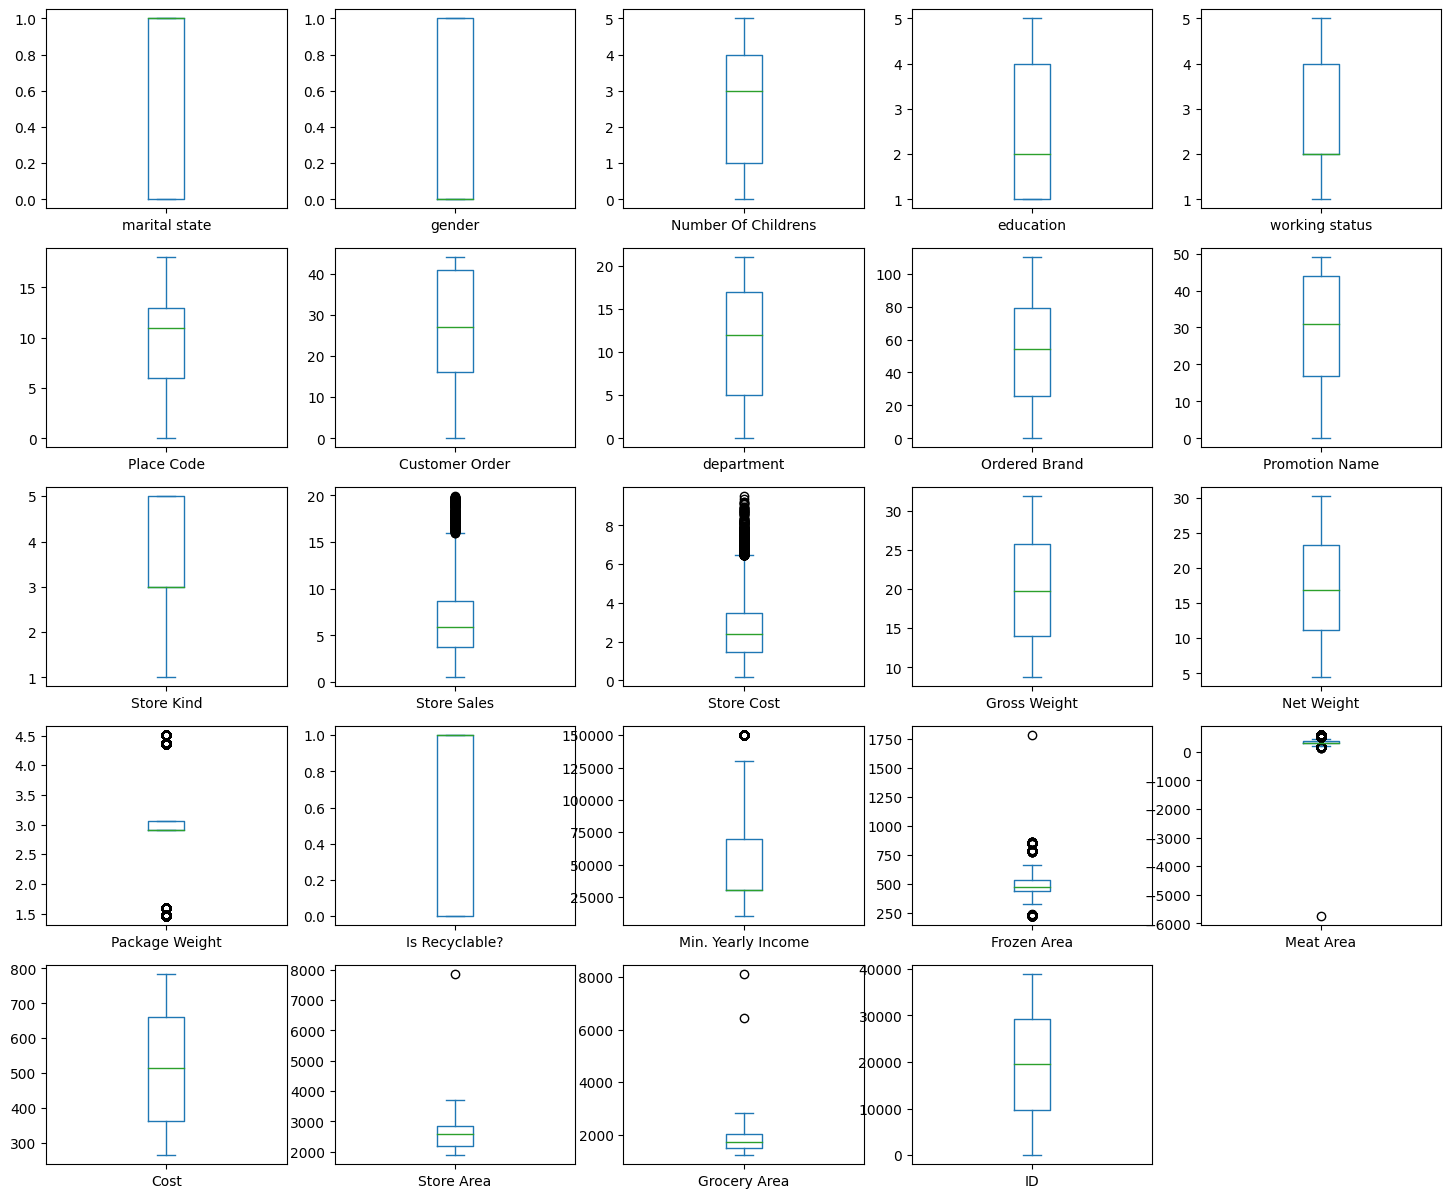

In [ ]:
# drawing a box plots for all columns

df.plot(kind='box', subplots=True, layout=(5,5), figsize=(18,15))
plt.show()

In [ ]:
df.keys()

Index(['marital state', 'gender', 'number of children', 'education', 'working',
       'Place Code', 'Customer Order', 'department', 'Ordered Brand',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Package Weight', 'Is Recyclable?', 'Yearly Income', 'Store Area',
       'Grocery Area', 'Frozen Area', 'Meat Area', 'ID'],
      dtype='object')

In [ ]:
columns=['Store Sales', 'Store Cost','Yearly Income','Package Weight','Frozen Area','Meat Area','Grocery Area','Store Area']
for column in columns:
  # Calculate IQR and define a multiplier (adjust as needed)
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  multiplier = 1.5

  # Set upper limit
  upper_limit = Q3 + multiplier * IQR

  # Replace values exceeding the upper limit with the upper limit
  df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])

  print(df)


       marital state gender  number of children  education  working  \
0                  1      M                   4          1        2   
1                  0      F                   3          5        4   
2                  1      F                   3          1        5   
3                  1      M                   3          1        1   
4                  1      M                   2          2        1   
...              ...    ...                 ...        ...      ...   
19602              0      F                   2          1        1   
19603              0      F                   1          1        2   
19604              0      F                   5          4        5   
19605              1      M                   1          5        4   
19606              0      F                   2          2        1   

       Place Code  Customer Order  department  Ordered Brand  \
0               1               6          20             53   
1              12  

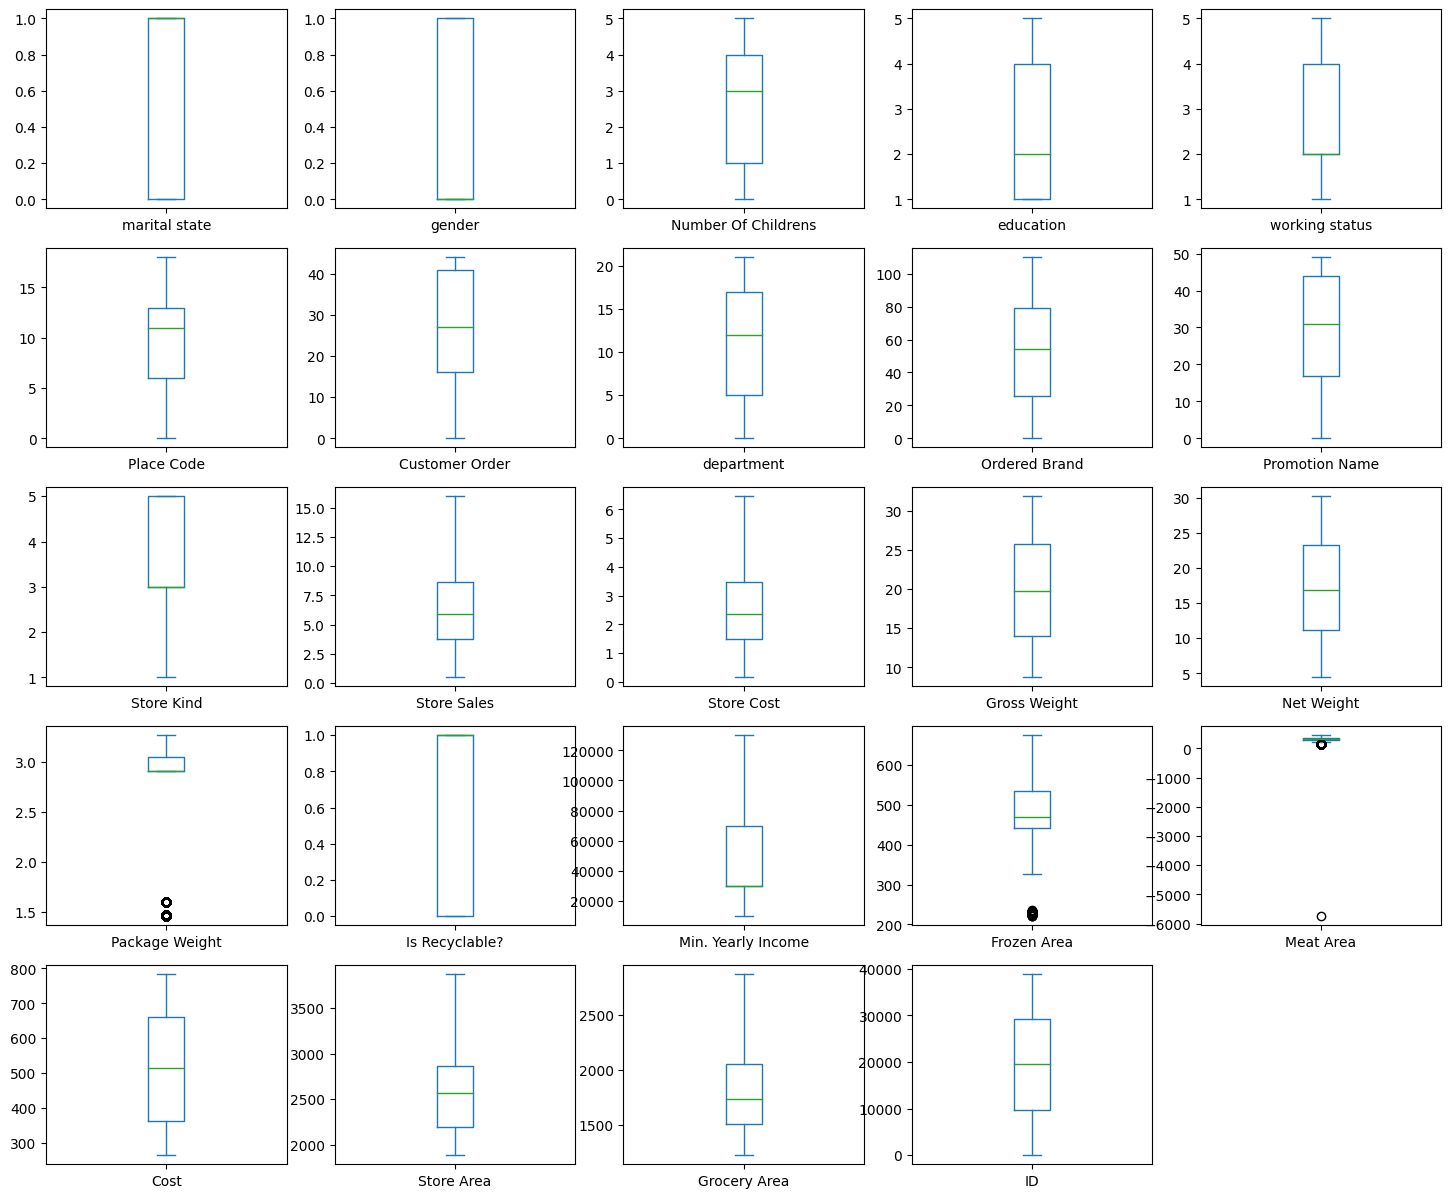

In [ ]:
# drawing a box plots for all columns

df.plot(kind='box', subplots=True, layout=(5,5), figsize=(18,15))
plt.show()

In [ ]:
df.to_csv('UnTransformedFeatures_AfterOutlier_preprocessed_data.csv', index=False)  # Specify the file name and set index=False to exclude the index column


In [ ]:
# import matplotlib.pyplot as plt

# # Create box plots for numerical columns
# df.boxplot(column=['Store Sales', 'Store Cost','Min. Yearly Income','Package Weight','Grocery Area', 'Meat Area','Frozen Area','Store Area'])
# plt.show()


In [ ]:
df.keys()

Index(['marital state', 'gender', 'Number Of Childrens', 'education',
       'working status', 'Place Code', 'Customer Order', 'department',
       'Ordered Brand', 'Additional Features in market', 'Promotion Name',
       'Store Kind', 'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Package Weight', 'Is Recyclable?', 'Min. Yearly Income', 'Frozen Area',
       'Meat Area', 'Cost', 'Store Area', 'Grocery Area', 'ID'],
      dtype='object')

In [ ]:
# #Transforming Data:

df['Package Weight'] = np.log1p(df['Package Weight'])
# df['Grocery Area'] = np.log1p(df['Grocery Area'])
df['Meat Area'] = np.log1p(df['Meat Area'])
df['Frozen Area'] = np.log1p(df['Frozen Area'])
# df['Store Area'] = np.log1p(df['Store Area'])



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


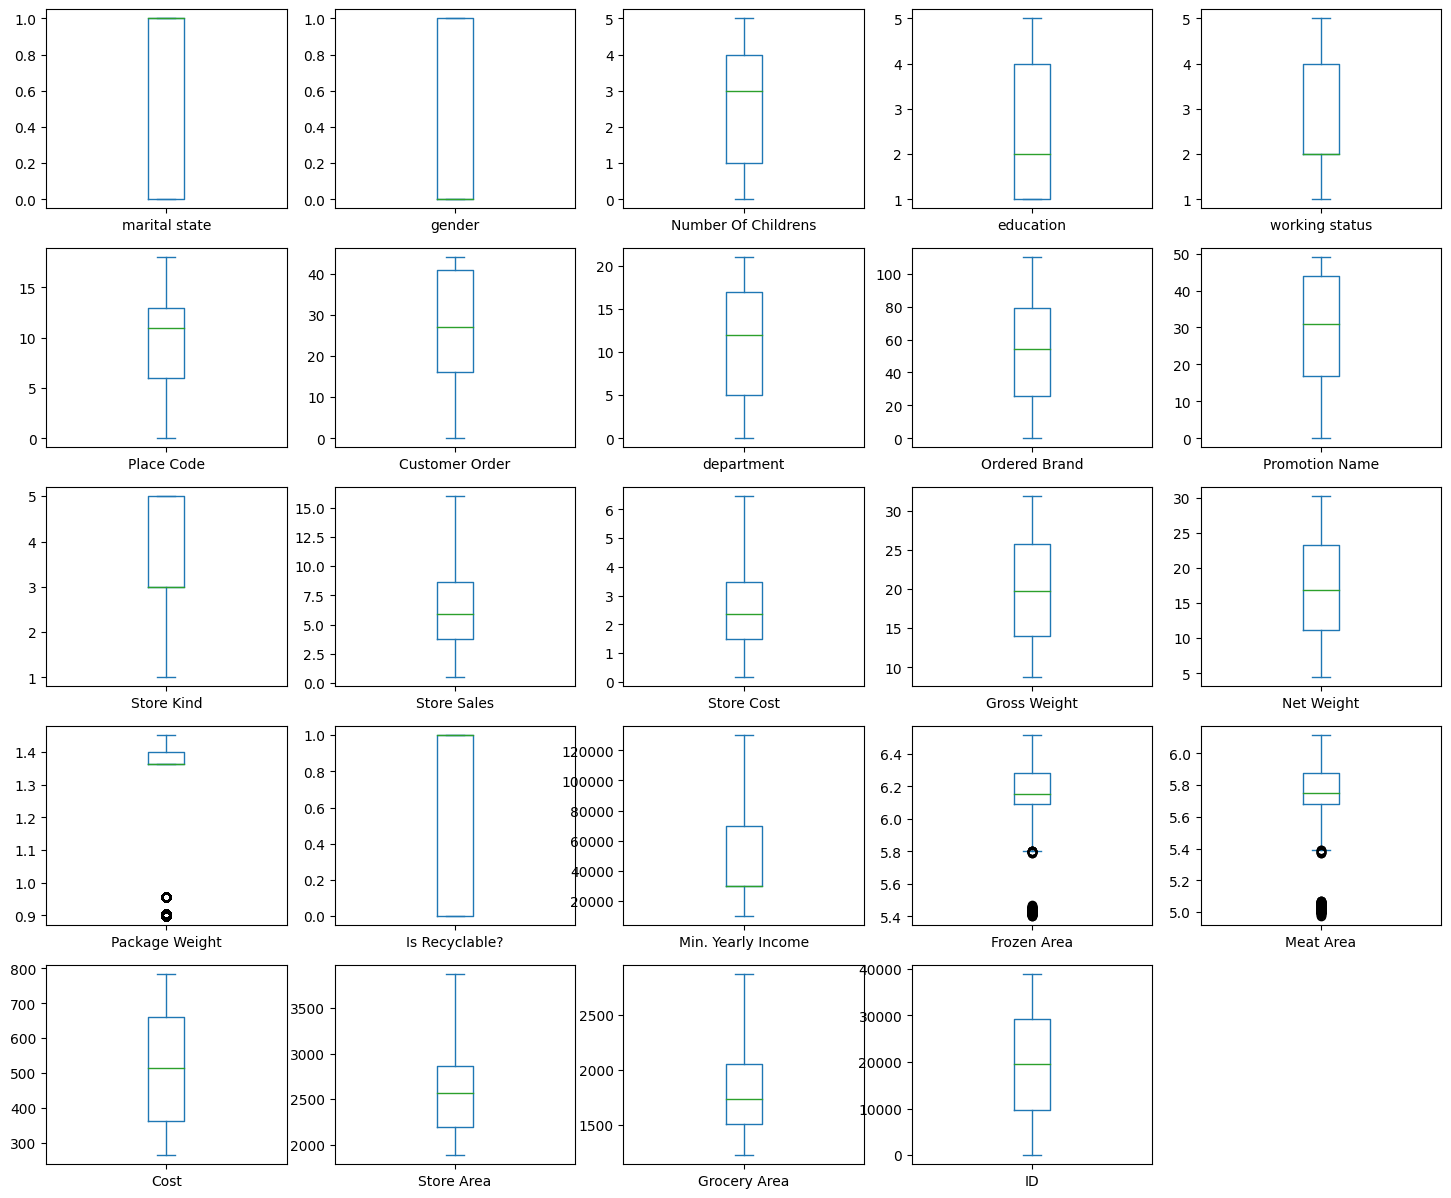

In [ ]:
# drawing a box plots for all columns

df.plot(kind='box', subplots=True, layout=(5,5), figsize=(18,15))
plt.show()

In [ ]:
# outliers.count()

In [ ]:
df.shape

(36991, 25)

In [ ]:
df.to_csv('Transformed_Outlier_preprocessed_data.csv', index=False)  # Specify the file name and set index=False to exclude the index column


In [ ]:
df.isnull().sum()

marital state                       0
gender                              0
Number Of Childrens                 0
education                           0
working status                      0
Place Code                          0
Customer Order                      0
department                          0
Ordered Brand                       0
Additional Features in market    4052
Promotion Name                      0
Store Kind                       5548
Store Sales                         0
Store Cost                          0
Gross Weight                     1823
Net Weight                       1822
Package Weight                   3363
Is Recyclable?                      0
Min. Yearly Income                  0
Frozen Area                         0
Meat Area                           1
Cost                                0
Store Area                          0
Grocery Area                        0
ID                                  0
dtype: int64

# Feature Engineering

> Scaling

> Feature Polynomial

> PCA

> Regulaizar term




## Feature Selection

In [ ]:
x_train,y_train,x_cv, x_test, y_cv, y_test = split_df(UnTransformedFeatures_AfterOutlier_preprocessed_data_df)

the shape of the training set (input) is: (13705, 39)
the shape of the training set (target) is: (13705,)

the shape of the cross validation set (input) is: (4569, 39)
the shape of the cross validation set (target) is: (4569,)

the shape of the test set (input) is: (4569, 39)
the shape of the test set (target) is: (4569,)


In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(x_train, 0.7)
len(set(corr_features))

15

In [ ]:
corr_features

{'Number Of Childrens_times_department',
 'Number Of Childrens_times_working status',
 'education_times_working status',
 'gender_times_Number Of Childrens',
 'gender_times_Ordered Brand',
 'gender_times_department',
 'gender_times_education',
 'gender_times_working status',
 'marital state_times_Number Of Childrens',
 'marital state_times_Ordered Brand',
 'marital state_times_department',
 'marital state_times_education',
 'marital state_times_working status',
 'working status_times_Ordered Brand',
 'working status_times_department'}

## Feature Polynomial Manually

In [ ]:
df_UN=UnTransformedFeatures_AfterOutlier_preprocessed_data_df.head()
df_UN

,marital state,gender,Number Of Childrens,education,working status,Place Code,Customer Order,department,Ordered Brand,Additional Features in market,...,Net Weight,Package Weight,Is Recyclable?,Min. Yearly Income,Frozen Area,Meat Area,Cost,Store Area,Grocery Area,ID
0,1,0,4,4,4,6,15,14,88,6.0,...,26.6008,1.5990,1,10000.0,481.98,323.00,602.7575,2842.23,2037.64,1
1,1,0,3,4,5,14,41,19,77,NaN,...,14.9720,1.5990,0,50000.0,457.36,307.87,708.6650,2814.95,2049.72,2
2,0,1,2,2,2,7,30,16,35,1.0,...,27.1822,1.4536,1,30000.0,523.32,348.85,564.2647,2192.32,1322.21,3
3,1,0,3,3,4,13,17,9,19,2.0,...,11.2944,2.9217,1,30000.0,440.92,293.95,724.5119,1974.73,1239.86,4
4,0,0,5,4,4,8,44,17,54,6.0,...,9.7100,2.9072,0,50000.0,593.93,395.95,519.7574,2862.30,1872.19,5


In [ ]:
UnTransformedFeatures_AfterOutlier_preprocessed_data_df.corr()

,marital state,gender,Number Of Childrens,education,working status,Place Code,Customer Order,department,Ordered Brand,Additional Features in market,...,Net Weight,Package Weight,Is Recyclable?,Min. Yearly Income,Frozen Area,Meat Area,Cost,Store Area,Grocery Area,ID
marital state,1.000000,0.019873,-0.029057,0.011040,-0.015556,-0.030839,0.007202,0.012372,-0.001646,0.009928,...,-0.008394,-0.002739,0.008883,-0.007656,-0.001087,-0.000798,-0.005374,0.002555,-0.002282,0.009404
gender,0.019873,1.000000,-0.025381,0.013087,-0.003416,0.010767,0.007252,-0.003336,-0.002057,-0.030780,...,-0.005630,0.004782,-0.004063,0.025201,0.015818,0.015825,-0.018229,-0.024974,-0.044647,0.004166
Number Of Childrens,-0.029057,-0.025381,1.000000,-0.031402,-0.024409,0.032200,-0.003760,-0.000264,-0.003580,0.033974,...,-0.006482,0.004055,-0.000834,-0.001929,0.001121,0.000832,-0.011781,0.009411,0.020761,-0.009483
education,0.011040,0.013087,-0.031402,1.000000,0.671089,-0.005060,-0.014193,-0.005575,-0.006147,-0.024816,...,-0.002733,0.008177,0.005997,0.410204,-0.003887,-0.004151,0.010294,-0.005050,-0.003373,-0.005800
working status,-0.015556,-0.003416,-0.024409,0.671089,1.000000,-0.016171,-0.007786,-0.002386,-0.004252,-0.014604,...,0.002809,0.000443,0.006108,0.688854,0.008207,0.007881,0.013684,0.005323,0.005925,-0.003939
Place Code,-0.030839,0.010767,0.032200,-0.005060,-0.016171,1.000000,-0.012731,0.000309,-0.003446,-0.021863,...,0.000362,0.007406,-0.000620,-0.007025,-0.015488,-0.018039,-0.030785,-0.055768,0.003180,0.003910
Customer Order,0.007202,0.007252,-0.003760,-0.014193,-0.007786,-0.012731,1.000000,0.540259,0.026082,0.002332,...,0.032170,-0.026732,0.012947,-0.005145,-0.013439,-0.013345,-0.008869,-0.009570,-0.006599,-0.001230
department,0.012372,-0.003336,-0.000264,-0.005575,-0.002386,0.000309,0.540259,1.000000,0.009080,0.000173,...,0.088398,0.008990,-0.008480,-0.003537,-0.007314,-0.007155,0.000106,-0.008688,-0.008439,0.003500
Ordered Brand,-0.001646,-0.002057,-0.003580,-0.006147,-0.004252,-0.003446,0.026082,0.009080,1.000000,0.004700,...,-0.005226,-0.006672,0.018849,-0.004014,0.004969,0.005037,0.003451,0.004607,0.003911,0.003040
Additional Features in market,0.009928,-0.030780,0.033974,-0.024816,-0.014604,-0.021863,0.002332,0.000173,0.004700,1.000000,...,0.007247,0.003335,0.006740,-0.011757,0.092312,0.091372,-0.101491,0.263791,0.339719,0.002749


In [ ]:
df_corr = pd.DataFrame(UnTransformedFeatures_AfterOutlier_preprocessed_data_df.corr())
df_corr.to_csv('Correlation.csv', index=True)  # Specify the file name and set index=False to exclude the index column


In [ ]:

# Custom function to generate new features by multiplying pairs of existing features
def create_interaction_features(df, features_to_multiply):
    for i in range(len(features_to_multiply)):
        for j in range(i + 1, len(features_to_multiply)):
            feature1 = features_to_multiply[i]
            feature2 = features_to_multiply[j]
            new_feature_name = f'{feature1}_times_{feature2}'
            df[new_feature_name] = df[feature1] * df[feature2]
    return df

# List of features to multiply
features_to_multiply = ['marital state', 'gender','Number Of Childrens','education',
                        'working status','department','Ordered Brand']

# Generate new interaction features
df = create_interaction_features(UnTransformedFeatures_AfterOutlier_preprocessed_data_df, features_to_multiply)

# Print the DataFrame with new features
print(df)


In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap to visualize the correlation
plt.figure(figsize=(24, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Feature1 and Feature2')
plt.show()


# Modeling

### Before train model

In [ ]:
BeforeOutliers_preprocessed_data_df = pd.read_csv('/content/BeforeOutliers_preprocessed_data.csv',sep=",",encoding="UTF-8")

BeforeOutliers_preprocessed_data_df.head()

In [ ]:

UnTransformedFeatures_AfterOutlier_preprocessed_data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IEEE Competition/UnTransformedFeatures_AfterOutlier_preprocessed_data.csv',sep=",",encoding="UTF-8")

UnTransformedFeatures_AfterOutlier_preprocessed_data_df.head()

In [ ]:
UnTransformedFeatures_AfterOutlier_preprocessed_data_df.shape

In [ ]:

Transformed_Outlier_preprocessed_data_df = pd.read_csv('/content/Transformed_Outlier_preprocessed_data.csv',sep=",",encoding="UTF-8")

Transformed_Outlier_preprocessed_data_df.head()

In [ ]:
#Remove all nulls in differenr dataframes

def remove_nulls(df_copy):
  df1=df_copy
  columns = ['Additional Features in market','Store Kind','Gross Weight','Net Weight','Package Weight']
  df1 = df1.dropna(subset=columns)
  df1 = df1.reset_index(drop=True)
  print("any nulls here ? ",df1.isnull().sum())
  return df1


In [ ]:
UnTransformedFeatures_AfterOutlier_preprocessed_data_df = remove_nulls(UnTransformedFeatures_AfterOutlier_preprocessed_data_df)

In [ ]:
df.to_csv('df_Cleaned.csv', index=False)  # Specify the file name and set index=False to exclude the index column


## Try with each DF Modeing Pipline

In [ ]:

UnTransformedFeatures_AfterOutlier_preprocessed_data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IEEE Competition/UnTransformedFeatures_AfterOutlier_preprocessed_data.csv',sep=",",encoding="UTF-8")

UnTransformedFeatures_AfterOutlier_preprocessed_data_df.head()

,marital state,gender,Number Of Childrens,education,working status,Place Code,Customer Order,department,Ordered Brand,Additional Features in market,...,Net Weight,Package Weight,Is Recyclable?,Min. Yearly Income,Frozen Area,Meat Area,Cost,Store Area,Grocery Area,ID
0,1,0,4,4,4,6,15,14,88,6.0,...,26.6008,1.5990,1,10000.0,481.98,323.00,602.7575,2842.23,2037.64,1
1,1,0,3,4,5,14,41,19,77,NaN,...,14.9720,1.5990,0,50000.0,457.36,307.87,708.6650,2814.95,2049.72,2
2,0,1,2,2,2,7,30,16,35,1.0,...,27.1822,1.4536,1,30000.0,523.32,348.85,564.2647,2192.32,1322.21,3
3,1,0,3,3,4,13,17,9,19,2.0,...,11.2944,2.9217,1,30000.0,440.92,293.95,724.5119,1974.73,1239.86,4
4,0,0,5,4,4,8,44,17,54,6.0,...,9.7100,2.9072,0,50000.0,593.93,395.95,519.7574,2862.30,1872.19,5


In [ ]:
UnTransformedFeatures_AfterOutlier_preprocessed_data_df.isnull().sum()

marital state                       0
gender                              0
Number Of Childrens                 0
education                           0
working status                      0
Place Code                          0
Customer Order                      0
department                          0
Ordered Brand                       0
Additional Features in market    1235
Promotion Name                      0
Store Kind                       1235
Store Sales                         0
Store Cost                          0
Gross Weight                     1823
Net Weight                       1822
Package Weight                   3363
Is Recyclable?                      0
Min. Yearly Income                  0
Frozen Area                         0
Meat Area                           0
Cost                                0
Store Area                          0
Grocery Area                        0
ID                                  0
dtype: int64

In [ ]:
df=UnTransformedFeatures_AfterOutlier_preprocessed_data_df

In [ ]:
#Remove all nulls in differenr dataframes

def remove_nulls(df_copy):
  df1=df_copy
  columns = ['Additional Features in market','Store Kind','Gross Weight','Net Weight','Package Weight']
  df1 = df1.dropna(subset=columns)
  df1 = df1.reset_index(drop=True)
  print("any nulls here ? ",df1.isnull().sum())
  return df1
UnTransformedFeatures_AfterOutlier_preprocessed_data_df = remove_nulls(UnTransformedFeatures_AfterOutlier_preprocessed_data_df)

any nulls here ?  marital state                    0
gender                           0
Number Of Childrens              0
education                        0
working status                   0
Place Code                       0
Customer Order                   0
department                       0
Ordered Brand                    0
Additional Features in market    0
Promotion Name                   0
Store Kind                       0
Store Sales                      0
Store Cost                       0
Gross Weight                     0
Net Weight                       0
Package Weight                   0
Is Recyclable?                   0
Min. Yearly Income               0
Frozen Area                      0
Meat Area                        0
Cost                             0
Store Area                       0
Grocery Area                     0
ID                               0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
def split_df(df1):
  drop_freatures=['Grocery Area','Meat Area','Net Weight','Store Area','Store Cost','Store Kind','ID',]
  # df.dropna(subset=drop_freatures)
  x = df1.drop(drop_freatures, axis=1)
  y = df1['Cost']
  x_features = x.keys()
  # Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
  x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

  # Split the 40% subset above into two: one half for cross validation and the other for the test set
  x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

  # Delete temporary variables
  del x_, y_

  print(f"the shape of the training set (input) is: {x_train.shape}")
  print(f"the shape of the training set (target) is: {y_train.shape}\n")
  print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
  print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
  print(f"the shape of the test set (input) is: {x_test.shape}")
  print(f"the shape of the test set (target) is: {y_test.shape}")
  return x_train,y_train,x_cv, x_test, y_cv, y_test

In [ ]:
x_train,y_train,x_cv, x_test, y_cv, y_test = split_df(df)

the shape of the training set (input) is: (21453, 18)
the shape of the training set (target) is: (21453,)

the shape of the cross validation set (input) is: (7151, 18)
the shape of the cross validation set (target) is: (7151,)

the shape of the test set (input) is: (7152, 18)
the shape of the test set (target) is: (7152,)


In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(x_train, 0.7)
len(set(corr_features))

0

In [ ]:
corr_features

set()

In [ ]:
df.keys()

Index(['marital state', 'gender', 'Number Of Childrens', 'education',
       'working status', 'Place Code', 'Customer Order', 'department',
       'Ordered Brand', 'Additional Features in market', 'Promotion Name',
       'Store Kind', 'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Package Weight', 'Is Recyclable?', 'Min. Yearly Income', 'Frozen Area',
       'Meat Area', 'Cost', 'Store Area', 'Grocery Area', 'ID'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load and Prepare Your Data
# Replace this with loading your dataset
# X should contain feature variables, y should contain the target variable
# 'Frozen Area', 'Grocery Area', 'Meat Area', 'Net Weight', 'Store Cost'
column = ['Frozen Area', 'Grocery Area', 'Meat Area', 'Net Weight', 'Store Cost','ID']
X = df.drop(column, axis=1)
y = df['Cost']


# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial Features
poly = PolynomialFeatures(degree=2)  # You can choose the degree you want
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# # PCA (Principal Component Analysis)
# pca = PCA(n_components=10)  # Choose the number of components you want
# X_train_pca = pca.fit_transform(X_train_poly)
# X_test_pca = pca.transform(X_test_poly)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test_poly)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


RMSE: 4.0045441578906414e-13


In [ ]:
#Save Model
import pickle

# Save the model to a file
with open('/content/drive/MyDrive/Colab Notebooks/IEEE Competition/my_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
#load model
with open('my_model.pkl', 'rb') as f:
    model = pickle.load(f)


## Test Data

In [ ]:

df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IEEE Competition/test.csv',sep=",",encoding="UTF-8")

df_test.head()

,Column1,marital state,gender,number of children,education,working,Place Code,Customer Order,department,Ordered Brand,...,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area
0,0,1,M,4,partial high school,skilled manual,B06ls_CA,Candy,Snacks,Gulf Coast,...,4.7040,31.8337,28.7811,3.0525,1,50,2201.06,1424.85,465.54,308.73
1,1,0,F,3,graduate degree,professional,S01em_OR,Vegetables,Frozen Foods,Golden,...,0.6696,29.9440,27.0368,2.9072,0,70,2577.16,1735.17,505.07,336.59
2,2,1,F,3,partial high school,management,H11go_ZA,Dairy,Dairy,Club,...,0.8235,29.2172,26.3100,2.9072,0,130,2837.58,2038.11,481.98,321.26
3,3,1,M,3,partial high school,manual,M10da_YU,Frozen Desserts,Frozen Foods,Imagine,...,4.4100,28.0543,25.0018,3.0525,0,10,2859.04,1871.16,593.93,394.58
4,4,1,M,2,high school degree,manual,L05es_CA,Hot Beverages,Beverages,BBB Best,...,1.9872,23.5482,20.6410,2.9072,0,30,2193.97,1320.15,523.32,348.85


In [ ]:
df_test.isnull().sum()

Column1                             0
marital state                       0
gender                              0
number of children                  0
education                           0
working                             0
Place Code                          0
Customer Order                      0
department                          0
Ordered Brand                       0
Additional Features in market       0
Promotion Name                     26
Store Kind                         28
Store Sales                         0
Store Cost                          0
Gross Weight                      983
Net Weight                       1018
Package Weight                      0
Is Recyclable?                      0
Yearly Income                       0
Store Area                        996
Grocery Area                     1042
Frozen Area                       961
Meat Area                         975
dtype: int64

In [ ]:
df_test.shape

(19942, 24)

### Fill Null Values

In [ ]:
df_test['Promotion Name'] = df_test['Promotion Name'].fillna(44)


In [ ]:
df_test.isnull().sum()

Column1                             0
marital state                       0
gender                              0
number of children                  0
education                           0
working                             0
Place Code                          0
Customer Order                      0
department                          0
Ordered Brand                       0
Additional Features in market       0
Promotion Name                     26
Store Kind                         28
Store Sales                         0
Store Cost                          0
Gross Weight                      983
Net Weight                       1018
Package Weight                      0
Is Recyclable?                      0
Yearly Income                       0
Store Area                        996
Grocery Area                     1042
Frozen Area                       961
Meat Area                         975
dtype: int64

###  Encode all Categories

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
df.keys()

Index(['marital state', 'gender', 'number of children', 'education', 'working',
       'Place Code', 'Customer Order', 'department', 'Ordered Brand',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Package Weight', 'Is Recyclable?', 'Yearly Income', 'Store Area',
       'Grocery Area', 'Frozen Area', 'Meat Area', 'ID'],
      dtype='object')

In [ ]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

<ipython-input-174-d946359cc912>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


5

In [ ]:
corr_features

{'Frozen Area', 'Grocery Area', 'Meat Area', 'Net Weight', 'Store Cost'}

In [ ]:
x_train=df

In [ ]:
### Scale/normalize the training data
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(x_norm,axis=0)}")

In [ ]:
x_train['Store Kind']

### SGD Regressor

In [ ]:
### Create and fit the regression model
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(x_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(x_norm)
# make a prediction using w,b.
y_pred = np.dot(x_norm, w_norm) + b_norm
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")



ValueError: ignored

In [ ]:
# # plot predictions and targets vs original features
# fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
# for i in range(len(ax)):
#     ax[i].scatter(x_train[:,i],y_train, label = 'target')
#     ax[i].set_xlabel(x_features[i])
#     ax[i].scatter(x_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
# ax[0].set_ylabel("Price"); ax[0].legend();
# fig.suptitle("target versus prediction using z-score normalized model")
# plt.show()

### Linear Regression Model

##### Andrew Model

In [ ]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(x_norm, y_train )

LinearRegression()

In [ ]:
# # Feed the scaled training set and get the predictions
# yhat = linear_model.predict(x_norm)

# # Use scikit-learn's utility function and divide by 2
# print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

# # for-loop implementation
# total_squared_error = 0

# for i in range(len(yhat)):
#     squared_error_i  = (yhat[i] - y_train[i])**2
#     total_squared_error += squared_error_i

# mse = total_squared_error / (2*len(yhat))
# rmse = np.sqrt(mse)
# print(f"training MSE (for-loop implementation): {mse.squeeze()}")
# print(f"training RMSE (for-loop implementation): {rmse.squeeze()}")

In [ ]:
# # Scale the cross validation set using the mean and standard deviation of the training set
# X_cv_scaled = scaler_linear.transform(x_cv)

# print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
# print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# # Feed the scaled cross validation set
# yhat = linear_model.predict(X_cv_scaled)

# # Use scikit-learn's utility function and divide by 2
# print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

In [ ]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(x_train)

# Preview the first 5 elements of the new training set. Left column is `x` and right column is `x^2`
# Note: The `e+<number>` in the output denotes how many places the decimal point should
# be moved. For example, `3.24e+03` is equal to `3240`
print(X_train_mapped[:5])

[[0.00000000e+00 1.00000000e+00 2.00000000e+00 ... 4.15776568e+06
  4.60215842e+07 5.09404900e+08]
 [1.00000000e+00 0.00000000e+00 1.00000000e+00 ... 2.03019752e+06
  2.61844684e+07 3.37714129e+08]
 [1.00000000e+00 0.00000000e+00 1.00000000e+00 ... 3.00849025e+06
  5.69592455e+07 1.07839992e+09]
 [0.00000000e+00 1.00000000e+00 4.00000000e+00 ... 1.74279602e+06
  1.10404145e+07 6.99397690e+07]
 [1.00000000e+00 0.00000000e+00 2.00000000e+00 ... 2.44878682e+06
  2.07359599e+07 1.75589001e+08]]


In [ ]:
# Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Preview the first 5 elements of the scaled training set.
print(X_train_mapped_scaled[:5])

[[-1.02340405  1.03603749 -0.3311525  ...  0.67679264  0.60407669
   0.05973528]
 [ 0.97713118 -0.96521604 -1.00461221 ... -0.8726511  -0.32516046
  -0.32108637]
 [ 0.97713118 -0.96521604 -1.00461221 ... -0.16019001  1.1164335
   1.3218044 ]
 [-1.02340405  1.03603749  1.01576692 ... -1.08195695 -1.03455883
  -0.91502786]
 [ 0.97713118 -0.96521604 -0.3311525  ... -0.56780514 -0.58038691
  -0.68069078]]


In [ ]:
# Initialize the class
model = LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train )

# Compute the training MSE
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(x_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Training MSE: 11073.272517911468
Cross validation MSE: 11178.548796412988
Root Mean Squared Error (RMSE): 155.57497662293153


In [ ]:
def plot_train_cv_mses(degrees, train_mses, cv_mses, title):
    degrees = range(1,11)
    plt.plot(degrees, train_mses, marker='o', c='r', label='training MSEs');
    plt.plot(degrees, cv_mses, marker='o', c='b', label='CV MSEs');
    plt.title(title)
    plt.xlabel("degree");
    plt.ylabel("MSE");
    plt.legend()
    plt.show()

In [ ]:
# Initialize lists containing the lists, models, and scalers
train_Rmses = []
cv_Rmses = []
models = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,5):

    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)

    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)

    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    rmse = np.sqrt(train_mse)
    train_Rmses.append(rmse)

    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    rmse = np.sqrt(cv_mse)
    cv_Rmses.append(rmse)

# Plot the results
degrees=range(1,11)
plot_train_cv_mses(degrees, train_Rmses, cv_Rmses, title="degree of polynomial vs. train and CV RMSEs")

In [ ]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_Rmses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

NameError: ignored

In [ ]:
# Add polynomial features to the test set
poly = PolynomialFeatures(degree, include_bias=False)
X_test_mapped = poly.fit_transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

##### Try Chatgpt model quickly

In [ ]:
# Initialize lists containing the lists, models, and scalers
train_Rmses_ = []
cv_Rmses_ = []
models_ = []
scalers_ = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):

    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)

    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)

    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    rmse = np.sqrt(train_mse)
    train_Rmses.append(rmse)

    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    rmse = np.sqrt(cv_mse)
    cv_Rmses.append(rmse)

# Plot the results
degrees=range(1,11)
plot_train_cv_mses(degrees, train_Rmses, cv_Rmses, title="degree of polynomial vs. train and CV RMSEs")


# Define your features (X) and target variable (y)
X = df_copy.drop('Cost', axis=1)
y = df_copy['Cost']

# Step 1: Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Polynomial Features
poly = PolynomialFeatures(degree=2)  # Adjust the degree as needed
X_poly = poly.fit_transform(X_scaled)

# Step 3: PCA
pca = PCA(n_components=2)  # Adjust the explained variance threshold
X_pca = pca.fit_transform(X_poly)

# Step 4: Regularization (Ridge Regression)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=0.4)  # Adjust alpha for regularization strength
ridge.fit(X_train, y_train)

# Make predictions
y_pred = ridge.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 159.50161694084568


In [ ]:
UnTransformedFeatures_AfterOutlier_preprocessed_data_df.keys()

Index(['marital state', 'gender', 'Number Of Childrens', 'education',
       'working status', 'Place Code', 'Customer Order', 'department',
       'Ordered Brand', 'Additional Features in market', 'Promotion Name',
       'Store Kind', 'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Package Weight', 'Is Recyclable?', 'Min. Yearly Income', 'Frozen Area',
       'Meat Area', 'Cost', 'Store Area', 'Grocery Area', 'ID'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load and Prepare Your Data
# Replace this with loading your dataset
# X should contain feature variables, y should contain the target variable
'Frozen Area', 'Grocery Area', 'Meat Area', 'Net Weight', 'Store Cost'
column = ['Frozen Area', 'Grocery Area', 'Meat Area', 'Net Weight', 'Store Cost']
X = df.drop(column, axis=1)
y = UnTransformedFeatures_AfterOutlier_preprocessed_data_df['Cost']


# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial Features
poly = PolynomialFeatures(degree=2)  # You can choose the degree you want
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# # PCA (Principal Component Analysis)
# pca = PCA(n_components=10)  # Choose the number of components you want
# X_train_pca = pca.fit_transform(X_train_poly)
# X_test_pca = pca.transform(X_test_poly)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test_poly)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


RMSE: 4.627267406222983e-13


In [ ]:
column = ['Frozen Area', 'Grocery Area', 'Meat Area', 'Net Weight', 'Store Cost','ID']
X = x_train.drop(column, axis=1)

In [ ]:
X = df.drop('ID', axis=1)

In [ ]:
df['Store Kind'].head()

0    4
1    5
2    5
3    5
4    3
Name: Store Kind, dtype: int64

In [ ]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

# Polynomial Features
poly = PolynomialFeatures(degree=2)  # You can choose the degree you want
X_train_poly = poly.fit_transform(X_train_scaled)
y_pred = model.predict(X_train_poly)


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IEEE Competition/test.csv',sep=",",encoding="UTF-8")

df_test.head()

,Column1,marital state,gender,number of children,education,working,Place Code,Customer Order,department,Ordered Brand,...,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area
0,0,1,M,4,partial high school,skilled manual,B06ls_CA,Candy,Snacks,Gulf Coast,...,4.7040,31.8337,28.7811,3.0525,1,50,2201.06,1424.85,465.54,308.73
1,1,0,F,3,graduate degree,professional,S01em_OR,Vegetables,Frozen Foods,Golden,...,0.6696,29.9440,27.0368,2.9072,0,70,2577.16,1735.17,505.07,336.59
2,2,1,F,3,partial high school,management,H11go_ZA,Dairy,Dairy,Club,...,0.8235,29.2172,26.3100,2.9072,0,130,2837.58,2038.11,481.98,321.26
3,3,1,M,3,partial high school,manual,M10da_YU,Frozen Desserts,Frozen Foods,Imagine,...,4.4100,28.0543,25.0018,3.0525,0,10,2859.04,1871.16,593.93,394.58
4,4,1,M,2,high school degree,manual,L05es_CA,Hot Beverages,Beverages,BBB Best,...,1.9872,23.5482,20.6410,2.9072,0,30,2193.97,1320.15,523.32,348.85


In [ ]:
df_test.shape

(19942, 18)

In [ ]:

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_test)

# Polynomial Features
poly = PolynomialFeatures(degree=2)  # You can choose the degree you want
X_train_poly = poly.fit_transform(X_train_scaled)

# PCA (Principal Component Analysis)
pca = PCA(n_components=10)  # Choose the number of components you want
X_train_pca = pca.fit_transform(X_train_poly)

# Predict and Evaluate
y_pred_ = model.predict(X_train_pca)

# # Compute the test MSE
# yhat = models[degree-1].predict(X_test_mapped_scaled)
# test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

In [ ]:
df_sample = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IEEE Competition/sample_submission.csv',sep=",",encoding="UTF-8")

df_sample.head()

,ID,Cost
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
df_sample['Cost'] = y_pred

ValueError: ignored

In [ ]:
num_records = 17745

# Create a DataFrame with 'cost' as the target variable
df22 = pd.DataFrame({'Record_ID': range(1, num_records + 1),
                   'Cost': y_pred})

In [ ]:
df22.to_csv('sample_Kaggle.csv', index=False)  # Specify the file name and set index=False to exclude the index column


In [ ]:
df22.head()

,Record_ID,Cost
0,1,393.653627
1,2,504.375681
2,3,581.076298
3,4,587.401282
4,5,391.551530


### Save Model

In [ ]:
import tensorflow as tf
import os


# Define a directory path in your Google Drive to save the model
drive_path = '/content/drive/My Drive/Your_Model_Directory/'

# Save the model
model.save(drive_path + 'my_model')

# List the contents of the directory
os.listdir(drive_path)

### Regressor Tree

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
# Assuming 'target' is your target variable
X = df_copy.drop('Cost', axis=1)
y = df_copy['Cost']

# Step 3: Scale your features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Create polynomial features (adjust the degree as needed)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

# Step 5: Apply PCA for dimensionality reduction (adjust the number of components)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_poly)

# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 7: Train a regression tree model with regularization
regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=1)
regressor.fit(X_train, y_train)

# Step 8: Evaluate the model using RMSE
y_pred = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


RMSE: 159.0407699339577


### XGboost

#### Try Chatgpt model quickly

In [ ]:
df_copy.isnull().sum()

marital state                    0
gender                           0
Number Of Childrens              0
education                        0
working status                   0
Place Code                       0
Customer Order                   0
department                       0
Ordered Brand                    0
Additional Features in market    0
Promotion Name                   0
Store Kind                       0
Store Sales                      0
Store Cost                       0
Gross Weight                     0
Net Weight                       0
Package Weight                   0
Is Recyclable?                   0
Min. Yearly Income               0
Frozen Area                      0
Meat Area                        0
Cost                             0
Store Area                       0
Grocery Area                     0
ID                               0
dtype: int64

In [ ]:
df_copy = df[:]
df_copy = df_copy.dropna(subset=['Promotion Name','Additional Features in market','Store Kind','Store Sales','Store Cost','Gross Weight','Net Weight','Net Weight','Package Weight','Is Recyclable?','Meat Area','Frozen Area','Store Area','Grocery Area'])

In [ ]:
# Replace 'Column_Name' with the actual name of the column you want to check
df_copy = df_copy[df_copy['Frozen Area'] != 0]
# Replace 'Column_Name' with the actual name of the column you want to check
df_copy = df_copy[df_copy['Meat Area'] != 0]
# Replace 'Column_Name' with the actual name of the column you want to check
df_copy = df_copy[df_copy['Store Area'] != 0]
# Replace 'Column_Name' with the actual name of the column you want to check
df_copy = df_copy[df_copy['Grocery Area'] != 0]
###########################################################################
df_copy = df_copy[df_copy['Grocery Area'] != 0]
df_copy = df_copy[df_copy['Grocery Area'] != 0]
df_copy = df_copy[df_copy['Grocery Area'] != 0]


In [ ]:
df_copy.shape

(8409, 25)

In [ ]:
df_copy.isnull().sum()

marital state                    0
gender                           0
Number Of Childrens              0
education                        0
working status                   0
Place Code                       0
Customer Order                   0
department                       0
Ordered Brand                    0
Additional Features in market    0
Promotion Name                   0
Store Kind                       0
Store Sales                      0
Store Cost                       0
Gross Weight                     0
Net Weight                       0
Package Weight                   0
Is Recyclable?                   0
Min. Yearly Income               0
Frozen Area                      0
Meat Area                        0
Cost                             0
Store Area                       0
Grocery Area                     0
ID                               0
dtype: int64

In [ ]:
df_copy.shape

(8409, 25)

In [ ]:
df_copy.isnull()

,marital state,gender,Number Of Childrens,education,working status,Place Code,Customer Order,department,Ordered Brand,Additional Features in market,...,Net Weight,Package Weight,Is Recyclable?,Min. Yearly Income,Frozen Area,Meat Area,Cost,Store Area,Grocery Area,ID
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19397,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19399,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19404,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_copy = df_copy.dropna()


In [ ]:
# Define your features (X) and target variable (y)
X = df_copy.drop('Cost', axis=1)
y = df_copy['Cost']

# Step 1: Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Polynomial Features
poly = PolynomialFeatures(degree=2)  # Adjust the degree as needed
X_poly = poly.fit_transform(X_scaled)

# Step 3: PCA
pca = PCA(n_components=0.95)  # Adjust the explained variance threshold
X_pca = pca.fit_transform(X_poly)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 4: XGBoost Regression
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)  # Use squarederror for regression
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 167.9304946436809


# **Habd text**

In [ ]:
df.head()

,ID,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","[Video Store, Ready Food, Florist, Coffee Bar,...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,323,602.7575
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650
2,mc_ID_2,"Married Male with two children, education: hig...",L05es_CA,"Magazines from Periodicals department, Ordered...",['Florist'],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,"{'Gross Weight': 28.6358, 'Net Weight': 27.182...",recyclable,30K+,2192.32,1322.21,523.32,348.85,564.2647
3,mc_ID_3,"Single Female with three children, education: ...",S03le_WA,"Dairy from Dairy department, Ordered Brand : C...",['Coffee Bar'],Savings Galore,NaN,1.98 Millions,0.6732 Millions,"{'Gross Weight': 14.2161, 'Net Weight': 11.294...",recyclable,30K+,1974.73,NaN,440.92,293.95,724.5119
4,mc_ID_4,"Married Female with five children, education: ...",M10da_YU,"Vegetables from Produce department, Ordered Br...","[Video Store, Ready Food, Florist, Coffee Bar,...",Sale Winners,Deluxe,11.56 Millions,4.9708 Millions,"{'Gross Weight': 12.6172, 'Net Weight': 9.71, ...",non recyclable,50K+,2862.3,1872.19,593.93,395.95,519.7574


0        False
1        False
2        False
3        False
4        False
         ...  
19435     True
19436     True
19437     True
19438     True
19439     True
Length: 19440, dtype: bool

--> *no dublicates Found*


In [ ]:
df= df.drop ('CustomerID',axis=1)

In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [ ]:
X_scaled

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [ ]:
df.describe()

,Frozen Area,Cost
count,17506.000000,19416.000000
mean,492.810453,519.620778
std,145.874844,157.423741
min,227.800000,265.631700
25%,440.920000,364.269500
50%,470.270000,516.776300
75%,534.290000,662.222600
max,855.220000,783.192500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19440 entries, 0 to 19439
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     19440 non-null  object 
 1   Person Description             19440 non-null  object 
 2   Place Code                     19440 non-null  object 
 3   Customer Order                 19440 non-null  object 
 4   Additional Features in market  15140 non-null  object 
 5   Promotion Name                 16530 non-null  object 
 6   Store Kind                     16530 non-null  object 
 7   Store Sales                    19440 non-null  object 
 8   Store Cost                     19440 non-null  object 
 9   Product Weights Data in (KG)   19440 non-null  object 
 10  Is Recyclable?                 19440 non-null  object 
 11  Min. Yearly Income             19437 non-null  object 
 12  Store Area                     17483 non-null 

In [ ]:
df.keys()

Index(['Unnamed: 0', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Product Weights Data in (KG)',
       'Is Recyclable?', 'Min. Yearly Income', 'Store Area', 'Grocery Area',
       'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

In [ ]:
df1.keys()

Index(['Unnamed: 0', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area',
       'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

In [ ]:
list3 = df2.keys()
list3 = list3.to_list()
list1 = df.keys().to_list()
print(list1)
print(list2)
print(list3)

['ID', 'Person Description', 'Place Code', 'Customer Order', 'Additional Features in market', 'Promotion Name', 'Store Kind', 'Store Sales', 'Store Cost', 'Product Weights Data in (KG)', 'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost']
['ID', 'Person Description', 'Place Code', 'Customer Order', 'Additional Features in market', 'Promotion Name', 'Store Kind', 'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight', 'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost']
['ID', 'Person Description', 'Place Code', 'Customer Order', 'Additional Features in market', 'Promotion Name', 'Store Kind', 'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight', 'Weights%20Data', 'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost']


In [ ]:
df1.head()

,ID,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884
2,mc_ID_2,"Married Female with three children, education:...",S04ne_WA,"Frozen Desserts from Frozen Foods department, ...",[],Tip Top Savings,Supermarket,8.4 M,3.192 M,16.7163,12.3555,no,30K+,2811.99,2049.72,457.36,304.91,557.8318
3,mc_ID_3,"Single Male with four children, education: par...",V13er_BC,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Ready Food', 'Bar For Salad', ...",Price Cutters,NaN,4.6 M,1.518 M,24.1296,NaN,yes,10K+,2147.17,NaN,373.1,248.79,642.0871
4,mc_ID_4,"Married Female with four children, education: ...",B14on_WA,"Meat from Deli department, Ordered Brand : Moms","['Ready Food', 'Bar For Salad']",Money Savers,Supermarket,6.81 M,3.2007 M,17.8792,16.4256,no,50K+,3685.30,2265.90,853.22,568.75,432.0503


In [ ]:
# Rename column headers
new_columns = {'Unnamed: 0': 'ID', 'Min. Yearly Income': 'Min. Person Yearly Income'}

#  new_columns = {'Unnamed: 0': 'ID','Person%20Description': 'Person Description', 'Min. Yearly Income': 'Min. Person Yearly Income', 'Place Code':'Place Code', 'Customer Order':'Customer Order',
#         'Additional Features in market':'Additional Features in market', 'Promotion Name':'Promotion Name', 'Store Kind':'Store Kind',
#         'Store Sales':'Store Sales', 'Store Cost':'Store Cost', 'Product Weights Data in (KG)':'Product Weights Data in (KG)',
#         'Is Recyclable?':'Is Recyclable?', 'Min. Yearly Income', 'Store Area', 'Grocery Area',
#        'Frozen Area', 'Meat Area', 'Cost'}

df.rename(columns=new_columns, inplace=True)
df.keys()

Index(['ID', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Product Weights Data in (KG)',
       'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area',
       'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

In [ ]:
# Rename column headers
new_columns = {'Unnamed: 0': 'ID', 'Min. Yearly Income': 'Min. Person Yearly Income'}

#  new_columns = {'Unnamed: 0': 'ID','Person%20Description': 'Person Description', 'Min. Yearly Income': 'Min. Person Yearly Income', 'Place Code':'Place Code', 'Customer Order':'Customer Order',
#         'Additional Features in market':'Additional Features in market', 'Promotion Name':'Promotion Name', 'Store Kind':'Store Kind',
#         'Store Sales':'Store Sales', 'Store Cost':'Store Cost', 'Product Weights Data in (KG)':'Product Weights Data in (KG)',
#         'Is Recyclable?':'Is Recyclable?', 'Min. Yearly Income', 'Store Area', 'Grocery Area',
#        'Frozen Area', 'Meat Area', 'Cost'}

df1.rename(columns=new_columns, inplace=True)
df1.keys()

list2=df1.keys().to_list()

In [ ]:
new_columns_df2 = {'Unnamed: 0' : 'ID', 'Person%20Description' : 'Person Description', 'Place%20Code':'Place Code',
       'Customer%20Order':'Customer Order', 'Additional%20Features%20in%20market':'Additional Features in market',
       'Promotion%20Name':'Promotion Name', 'Store%20Kind':'Store Kind', 'Store%20Sales':'Store Sales', 'Store%20Cost':'Store Cost',
       'Gross%20Weight':'Gross Weight', 'Net%20Weight':'Net Weight', 'Is%20Recyclable?':'Is Recyclable?',
       'Yearly%20Income':'Min. Person Yearly Income', 'Store%20Area':'Store Area', 'Grocery%20Area':'Grocery Area', 'Frozen%20Area':'Frozen Area',
       'Meat%20Area':'Meat Area', 'Cost':'Cost'}
df2.rename(columns=new_columns_df2, inplace=True)
df2.keys()

# #df1
#        'Unnamed: 0', 'Person Description', 'Place Code', 'Customer Order',
#        'Additional Features in market', 'Promotion Name', 'Store Kind',
#        'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
#        'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area',
#        'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'

Index(['ID', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Weights%20Data', 'Is Recyclable?', 'Min. Person Yearly Income',
       'Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

In [ ]:
common_columns = list(set(df.columns) & set(df1.columns) & set(df2.columns))
batch1_common = df[common_columns]
batch2_common = df1[common_columns]
batch3_common = df2[common_columns]
concatenated_df = pd.concat([batch1_common, batch2_common, batch3_common], ignore_index=True)


In [ ]:
common_key = 'ID'  # Replace with the actual key column name
merged_df = df.merge(df1, on=common_key, how='outer').merge(df2, on=common_key, how='outer')


In [ ]:
df2['Weights%20Data'][0]

"{'Gross Weight': 23.2575, 'Net Weight': 20.3503, 'Package Weight': 2.9072}"

In [ ]:
new_value = ['Video Store', 'Ready Food', 'Florist', 'Coffee Bar', 'Bar For Salad']
my_array = np.array(new_value)

for i in range(df.shape[0]):
  if df['Store Kind'][i] == 'Deluxe' :
    df['Additional Features in market'][i] = ['Florist', 'Bar For Salad', 'Ready Food', 'Video Store', 'Coffee Bar']
    str(df['Additional Features in market'][i])

df['Additional Features in market'].value_counts()


<ipython-input-122-cf0da11bb305>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Additional Features in market'][i] = ['Florist', 'Bar For Salad', 'Ready Food', 'Video Store', 'Coffee Bar']


[Florist, Bar For Salad, Ready Food, Video Store, Coffee Bar]              6220
['Coffee Bar']                                                             2230
['Florist']                                                                1322
['Ready Food', 'Bar For Salad']                                            1037
['Bar For Salad', 'Ready Food']                                             933
                                                                           ... 
['Florist', 'Bar For Salad', 'Ready Food', 'Video Store', 'Coffee Bar']      10
['Ready Food', 'Florist', 'Video Store', 'Bar For Salad', 'Coffee Bar']      10
['Bar For Salad', 'Florist', 'Ready Food', 'Video Store', 'Coffee Bar']      10
['Bar For Salad', 'Coffee Bar', 'Video Store', 'Ready Food', 'Florist']       9
['Bar For Salad', 'Video Store', 'Florist', 'Coffee Bar', 'Ready Food']       9
Name: Additional Features in market, Length: 151, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df1 = pd.read_csv('/content/Train_Batch_2.csv',sep=",",encoding="UTF-8")

df1.head()


,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884
2,mc_ID_2,"Married Female with three children, education:...",S04ne_WA,"Frozen Desserts from Frozen Foods department, ...",[],Tip Top Savings,Supermarket,8.4 M,3.192 M,16.7163,12.3555,no,30K+,2811.99,2049.72,457.36,304.91,557.8318
3,mc_ID_3,"Single Male with four children, education: par...",V13er_BC,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Ready Food', 'Bar For Salad', ...",Price Cutters,NaN,4.6 M,1.518 M,24.1296,NaN,yes,10K+,2147.17,NaN,373.1,248.79,642.0871
4,mc_ID_4,"Married Female with four children, education: ...",B14on_WA,"Meat from Deli department, Ordered Brand : Moms","['Ready Food', 'Bar For Salad']",Money Savers,Supermarket,6.81 M,3.2007 M,17.8792,16.4256,no,50K+,3685.30,2265.90,853.22,568.75,432.0503


In [ ]:
df1.describe()

,Gross Weight,Net Weight,Store Area,Grocery Area,Meat Area,Cost
count,11014.000000,11018.000000,11663.000000,11658.000000,11688.000000,12953.000000
mean,20.032870,17.149701,2598.170053,1773.400262,329.709677,518.565349
std,6.700986,6.804349,524.954453,365.488893,96.819335,155.198098
min,8.721600,4.433500,1882.710000,1233.080000,149.900000,265.631700
25%,14.045325,11.207200,2189.080000,1506.990000,293.577500,364.269500
50%,19.768900,16.861700,2572.860000,1734.500000,313.550000,515.259600
75%,25.728600,23.257500,2864.085000,2052.540000,394.272500,660.235200
max,31.833700,30.234700,3692.840000,2822.650000,570.740000,783.192500


In [ ]:
df.head(2)

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,323,602.7575
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650


In [ ]:
df['Person Description'][2]

'Married Male with two children, education: high school degree working as skilled manual'

In [ ]:
df['Promotion Name'][2]

'Shelf Emptiers'

In [ ]:
df2.describe()

,Gross%20Weight,Net%20Weight,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Cost
count,5491.000000,5511.000000,6151.000000,6138.000000,6147.000000,6133.000000,6462.000000
mean,20.153632,17.152036,2602.487761,1779.720722,493.928194,328.839786,519.355948
std,6.683436,6.744036,532.761319,367.559597,147.995833,97.616394,158.578508
min,8.721600,4.491600,1882.710000,1233.240000,227.800000,149.900000,265.631700
25%,14.223400,11.294400,2190.910000,1508.000000,440.920000,293.120000,364.164900
50%,19.914200,16.861700,2572.860000,1734.500000,470.270000,313.550000,516.776300
75%,26.019300,22.966800,2863.465000,2052.550000,534.290000,356.190000,662.222600
max,31.833700,30.234700,7857.550000,2822.610000,1783.640000,570.730000,783.192500


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df2 = pd.read_csv('/content/Train_Batch_3.csv',sep=",",encoding="UTF-8")

df2.head()


,Unnamed: 0,Person%20Description,Place%20Code,Customer%20Order,Additional%20Features%20in%20market,Promotion%20Name,Store%20Kind,Store%20Sales,Store%20Cost,Gross%20Weight,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Cost
0,mc_ID_0,"Single Female with two children, education: pa...",T02ma_WA,"Meat from Deli department, Ordered Brand : Red...","['Coffee Bar', 'Florist', 'Ready Food', 'Bar F...",Sale : Double Down,Deluxe,7.12 Millions,2.5632 Millions,23.2575,20.3503,"{'Gross Weight': 23.2575, 'Net Weight': 20.350...",yes,90K+,3145.51,2056.79,654.13,436.09,500.7202
1,mc_ID_1,"Single Female with five children, education: p...",M10da_YU,"Specialty from Produce department, Ordered Bra...","['Coffee Bar', 'Florist', 'Bar For Salad', 'Vi...",GLD,Deluxe,14.72 Millions,7.0656 Millions,16.7163,12.3555,"{'Gross Weight': 16.7163, 'Net Weight': 12.355...",yes,30K+,2856.68,1871.16,595.93,395.51,484.1411
2,mc_ID_2,"Married Male with three children, education: h...",T02ma_WA,"Paper Products from Household department, Orde...","['Coffee Bar', 'Bar For Salad', 'Ready Food', ...",Promo Big,Deluxe,4.98 Millions,2.4402 Millions,10.5531,7.6459,"{'Gross Weight': 10.5531, 'Net Weight': 7.6459...",no,30K+,3140.99,2055.29,654.13,436.09,267.3576
3,mc_ID_3,"Married Female with five children, education: ...",H11go_ZA,"Snack Foods from Snack Foods department, Order...","['Video Store', 'Coffee Bar', 'Ready Food', 'F...",Price Destroyers,NaN,5.24 Millions,2.0436 Millions,23.6936,NaN,"{'Gross Weight': 23.6936, 'Net Weight': 20.641...",no,10K+,2841.35,2038.11,481.98,322.22,777.2826
4,mc_ID_4,"Married Female with No children, education: pa...",O09ba_VE,"Canned Soup from Canned Foods department, Orde...","['Ready Food', 'Bar For Salad']",Save Price,Supermarket,8.84 Millions,3.4476 Millions,13.6056,10.6839,"{'Gross Weight': 13.6056, 'Net Weight': 10.683...",no,110K+,3236.33,2448.37,472.27,313.87,406.4756


In [ ]:
df2['Additional%20Features%20in%20market'][0]

"['Coffee Bar', 'Florist', 'Ready Food', 'Bar For Salad']"

In [ ]:
df1['Additional Features in market'][0]

"['Video Store', 'Florist', 'Ready Food', 'Bar For Salad', 'Coffee Bar']"

In [ ]:
df1.head()

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884
2,mc_ID_2,"Married Female with three children, education:...",S04ne_WA,"Frozen Desserts from Frozen Foods department, ...",[],Tip Top Savings,Supermarket,8.4 M,3.192 M,16.7163,12.3555,no,30K+,2811.99,2049.72,457.36,304.91,557.8318
3,mc_ID_3,"Single Male with four children, education: par...",V13er_BC,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Ready Food', 'Bar For Salad', ...",Price Cutters,NaN,4.6 M,1.518 M,24.1296,NaN,yes,10K+,2147.17,NaN,373.1,248.79,642.0871
4,mc_ID_4,"Married Female with four children, education: ...",B14on_WA,"Meat from Deli department, Ordered Brand : Moms","['Ready Food', 'Bar For Salad']",Money Savers,Supermarket,6.81 M,3.2007 M,17.8792,16.4256,no,50K+,3685.30,2265.90,853.22,568.75,432.0503


In [ ]:
import pandas as pd

# Concatenate the DataFrames vertically (along rows)
concatenated_df = pd.concat([df1, df2, df], ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
concatenated_df.to_csv('/content/concatenated.csv', index=False)



In [ ]:
concatenated_df.head()

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,...,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Product Weights Data in (KG),Min. Yearly Income
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mc_ID_2,"Married Female with three children, education:...",S04ne_WA,"Frozen Desserts from Frozen Foods department, ...",[],Tip Top Savings,Supermarket,8.4 M,3.192 M,16.7163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mc_ID_3,"Single Male with four children, education: par...",V13er_BC,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Ready Food', 'Bar For Salad', ...",Price Cutters,NaN,4.6 M,1.518 M,24.1296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mc_ID_4,"Married Female with four children, education: ...",B14on_WA,"Meat from Deli department, Ordered Brand : Moms","['Ready Food', 'Bar For Salad']",Money Savers,Supermarket,6.81 M,3.2007 M,17.8792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head(10)


,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,323,602.7575
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650
2,mc_ID_2,"Married Male with two children, education: hig...",L05es_CA,"Magazines from Periodicals department, Ordered...",['Florist'],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,"{'Gross Weight': 28.6358, 'Net Weight': 27.182...",recyclable,30K+,2192.32,1322.21,523.32,348.85,564.2647
3,mc_ID_3,"Single Female with three children, education: ...",S03le_WA,"Dairy from Dairy department, Ordered Brand : C...",['Coffee Bar'],Savings Galore,NaN,1.98 Millions,0.6732 Millions,"{'Gross Weight': 14.2161, 'Net Weight': 11.294...",recyclable,30K+,1974.73,NaN,440.92,293.95,724.5119
4,mc_ID_4,"Married Female with five children, education: ...",M10da_YU,"Vegetables from Produce department, Ordered Br...","['Bar For Salad', 'Ready Food', 'Coffee Bar', ...",Sale Winners,Deluxe,11.56 Millions,4.9708 Millions,"{'Gross Weight': 12.6172, 'Net Weight': 9.71, ...",non recyclable,50K+,2862.3,1872.19,593.93,395.95,519.7574
5,mc_ID_5,"Single Male with four children, education: hig...",S03le_WA,"Candles from Household department, Ordered Bra...",['Coffee Bar'],Weekend Discount,Supermarket,5.22 Millions,1.6182 Millions,"{'Gross Weight': 15.4081, 'Net Weight': 13.954...",recyclable,30K+,1970.17,1236.07,440.92,293.95,364.1649
6,mc_ID_6,"Married Female with five children, education: ...",S04ne_WA,Pain Relievers from Health and Hygiene departm...,NaN,Price Winners,NaN,8.49 Millions,3.7356 Millions,"{'Gross Weight': 17.1524, 'Net Weight': 14.245...",recyclable,130K+,2814.82,2049.72,457.36,304.91,599.3580
7,mc_ID_7,"Married Male with four children, education: pa...",A17co_GU,"Vegetables from Frozen Foods department, Order...",NaN,Shelf Clearing Days,Supermarket,6.57 Millions,2.6937 Millions,"{'Gross Weight': 17.2978, 'Net Weight': 14.376...",recyclable,10K+,NaN,1623.48,341.05,NaN,288.8006
8,mc_ID_8,"Married Male with five children, education: hi...",O09ba_VE,Beer and Wine from Alcoholic Beverages departm...,"['Bar For Salad', 'Ready Food']",Big Time Discounts,Supermarket,2.43 Millions,1.1907 Millions,"{'Gross Weight': 25.1472, 'Net Weight': 23.548...",recyclable,30K+,3236.46,2449.91,472.27,313.55,501.9754
9,mc_ID_9,"Single Male with one child, education: high sc...",S01em_OR,"Vegetables from Produce department, Ordered Br...","['Bar For Salad', 'Video Store', 'Ready Food',...",Lottery Cash Registerion,Deluxe,4.02 Millions,1.2864 Millions,"{'Gross Weight': 14.972, 'Net Weight': 12.0648...",non recyclable,30K+,2572.49,1734.5,503.07,333.55,290.7357


In [ ]:
df1.head(2)

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884


In [ ]:
df2.head(2)

,Unnamed: 0,Person%20Description,Place%20Code,Customer%20Order,Additional%20Features%20in%20market,Promotion%20Name,Store%20Kind,Store%20Sales,Store%20Cost,Gross%20Weight,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Cost
0,mc_ID_0,"Single Female with two children, education: pa...",T02ma_WA,"Meat from Deli department, Ordered Brand : Red...","['Coffee Bar', 'Florist', 'Ready Food', 'Bar F...",Sale : Double Down,Deluxe,7.12 Millions,2.5632 Millions,23.2575,20.3503,"{'Gross Weight': 23.2575, 'Net Weight': 20.350...",yes,90K+,3145.51,2056.79,654.13,436.09,500.7202
1,mc_ID_1,"Single Female with five children, education: p...",M10da_YU,"Specialty from Produce department, Ordered Bra...","['Coffee Bar', 'Florist', 'Bar For Salad', 'Vi...",GLD,Deluxe,14.72 Millions,7.0656 Millions,16.7163,12.3555,"{'Gross Weight': 16.7163, 'Net Weight': 12.355...",yes,30K+,2856.68,1871.16,595.93,395.51,484.1411


In [ ]:
concatenated_df.head(2)

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,...,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Product Weights Data in (KG),Min. Yearly Income
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Promotion Name'].value_counts()

Save Price                  676
Weekend Discount            660
Two Day Sale                633
Price Winners               579
Super Savers                568
Save It (Sale)              541
One Day Sale                519
Super Duper Savers          508
Roller Savings (High)       497
GLD                         478
Price Slashers              476
Full Free                   463
Shelf Clearing Days         459
Sale : Double Down          457
Lottery Cash Registerion    418
Two for One                 407
Big Time Discounts          400
Go For It                   394
Money Savers                379
Price Destroyers            369
Budget Bargains             360
Saving Days                 351
Discount Frenzy             332
Best Price Savers           327
Price Cutters               323
Dimes Off                   301
Savings Galore              298
Bag Stuffer                 287
Promo Big                   285
You Save Days               283
Sales Days                  279
I Cant B

In [ ]:
df['Store Kind'].value_counts()

Supermarket      7209
Deluxe           6220
Gourmet          1821
Mid-Size          761
Small Grocery     519
Name: Store Kind, dtype: int64

In [ ]:
df['Store Sales'].value_counts()

5.04 Millions     99
4.8 Millions      91
5.4 Millions      90
8.52 Millions     89
7.95 Millions     86
                  ..
18.8 Millions      1
1.61 Millions      1
3.21 Millions      1
16.35 Millions     1
19.05 Millions     1
Name: Store Sales, Length: 945, dtype: int64

In [ ]:
df['Gross Weight'][0]

KeyError: ignored

In [ ]:
df['Net Weight'].value_counts()

KeyError: ignored

In [ ]:
df['Package Weight'].value_counts

KeyError: ignored

In [ ]:
from google.colab import data_table
data_table.DataTable(df, include_index=False, num_rows_per_page=10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# getting the dataset's rows and columns by invoking the shape() function
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Habd

In [ ]:
outliers.count()

marital state                    0
gender                           0
Number Of Childrens              0
education                        0
working status                   0
Place Code                       0
Customer Order                   0
department                       0
Ordered Brand                    0
Additional Features in market    0
Promotion Name                   0
Store Kind                       0
Store Sales                      0
Store Cost                       0
Gross Weight                     0
Net Weight                       0
Package Weight                   0
Is Recyclable?                   0
Min. Yearly Income               0
Frozen Area                      0
Meat Area                        0
Cost                             0
Store Area                       0
Grocery Area                     0
ID                               0
dtype: int64

In [ ]:
from scipy import stats

z_scores = stats.zscore(df['Min. Yearly Income'])
threshold = 3  # Adjust as needed
outliers = df[(z_scores > threshold) | (z_scores < -threshold)]


In [ ]:
#set lower and upper bounds
Q1 = df['Min. Yearly Income'].quantile(0.25)
Q3 = df['Min. Yearly Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Min. Yearly Income'] < lower_bound) | (df['Min. Yearly Income'] > upper_bound)]


In [ ]:
import seaborn as sns

# Create a scatter plot
sns.scatterplot(x='Min. Yearly Income', y='education', data=df)
plt.show()


In [ ]:
df.keys()

In [ ]:
import matplotlib.pyplot as plt

# Create box plots for numerical columns
df.boxplot(column=['Store Sales', 'Store Cost','Min. Yearly Income',])
plt.show()


In [ ]:
# # Create box plots for numerical columns
# df.boxplot(column=['Grocery Area', 'Meat Area','Frozen Area','Store Area'])
# plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X_scaled = scaler.fit_transform(X)

# X_scaled now contains your scaled data


scaler

Normalization

In [ ]:
plt.subplots(figsize = (8, 8))
sns.heatmap(df.corr(), annot = True)